# Title: Social Media Sentiment Analysis

In [44]:
from IPython.display import HTML

# URL of the image
image_url = 'https://www.welovedigitalmarketing.com/wp-content/uploads/2021/08/Tracking-the-Important-Social-Media-Analytics.png'

# Constructing the HTML code to display the image
html_code = f'<img src="{image_url}" width="900">'

# Display the image
HTML(html_code)


## Objective: 
### The objective of social media sentiment analysis is to systematically identify, extract, quantify, and study affective states and subjective information from text data generated by users on social media platforms. Here are the key objectives and benefits of conducting sentiment analysis on social media data:

### Understanding Public Sentiment: To gauge public opinion regarding topics like brands, products, services, policies, or events.

### Brand Monitoring: To monitor brand reputation by analyzing how people feel about a brand or company, which can inform public relations and marketing strategies.

### Market Research and Analysis: To understand consumer needs and preferences, which can aid in product development and targeted marketing.

### Customer Service and Support: To quickly identify and respond to negative customer experiences or feedback, thereby improving customer satisfaction and loyalty.

### Political Campaigning: To assess public reaction to campaigns, policies, or political figures, which can influence campaign strategies.

### Trend Analysis: To detect shifts in public mood or sentiment trends over time, which can predict market movements or societal changes.

### Crisis Management: To identify potential crises brewing online, allowing organizations to take proactive measures to mitigate damage.

### Competitive Analysis: To compare sentiment towards competitors, which can uncover strengths and weaknesses in comparison to market rivals.

### In summary, social media sentiment analysis provides valuable insights that can influence decision-making across various levels of an organization, from marketing to customer service to product development.

## Data Exploration

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\BHAVIN\Desktop\UOP Sem 1\Personal Project\Project 3 - Sentiment Analysis\sentimentdataset.csv')

In [3]:
#checking null values
df.isna().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [4]:
!pip install wordcloud

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd


# Define the min_df and max_df parameters for TfidfVectorizer
#min_df = 0.001
#max_df = 0.75

#Extracting English words from the text
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['Text'].fillna(''))

# Retrieve the terms found by the vectorizer
terms = tfidf.get_feature_names_out()

# Sum the TF-IDF scores for each term across all documents
sums = X.sum(axis=0)

# Flatten the sums array and convert to a list
sums = sums.A1.tolist()

# Create a dictionary with terms and their summed scores
freqs = dict(zip(terms, sums))

In [6]:
X.shape

(732, 2389)

In [7]:
freqs

{'ablaze': 0.3743133741652681,
 'abstract': 0.7758276502269683,
 'abyss': 1.5768819099523883,
 'academic': 0.6641837768566297,
 'acceptance': 3.164689256138543,
 'accepts': 0.327556629856786,
 'accidentally': 1.3972024741683269,
 'accomplished': 0.899111881251432,
 'accomplishing': 0.5020354623940118,
 'accomplishment': 2.05145014575037,
 'achieve': 0.80730042392012,
 'achieved': 0.7926867203408545,
 'achievement': 2.1438125157547425,
 'achievements': 0.6801751439560559,
 'achieving': 2.2536624951175854,
 'aching': 0.44852075972177685,
 'acoustic': 0.36269358335367163,
 'act': 0.8986043553230838,
 'action': 1.067707527900664,
 'activated': 0.5804444409325654,
 'activities': 0.6308463204613257,
 'actor': 0.6588502535981346,
 'acts': 1.085342103666692,
 'adele': 0.697656541609925,
 'admiration': 0.764607657503759,
 'admiring': 0.9700637113111164,
 'adopted': 0.49860558594731424,
 'adorable': 0.5451156696590179,
 'adoration': 0.959708492360543,
 'adrenaline': 0.7055624754874817,
 'adrift'

#### Plotting the WordCloud for common words in text column

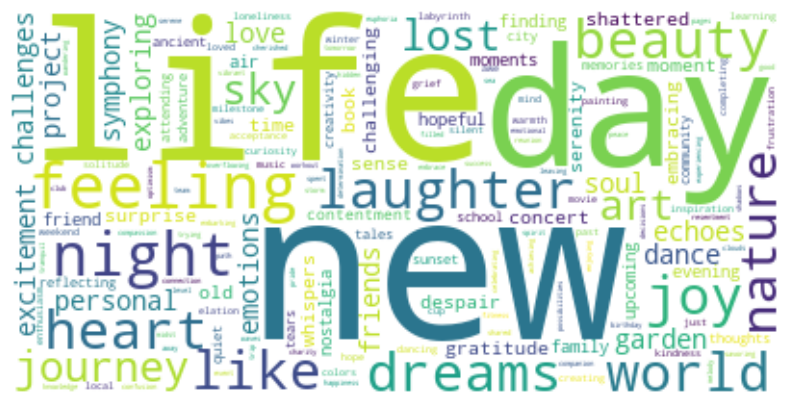

In [8]:
# Generate and display a word cloud
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(freqs)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

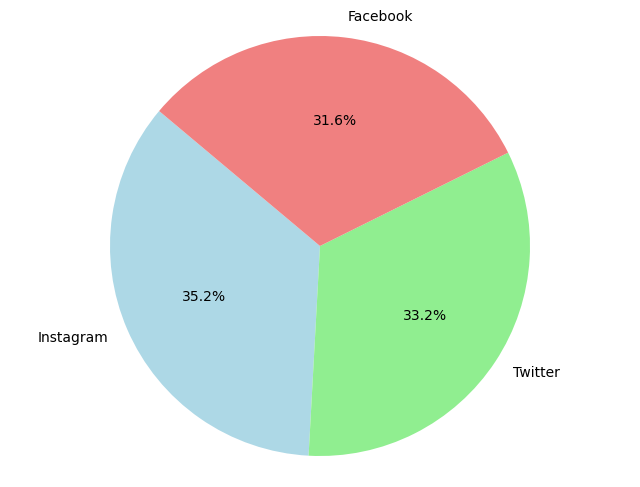

In [9]:
import matplotlib.pyplot as plt
df['Platform'] = df['Platform'].str.strip()
colors = ['lightblue', 'lightgreen', 'lightcoral']
sizes = df['Platform'].value_counts()

labels = sizes.index

index = sizes.values

plt.figure(figsize=(8,6))
plt.pie(index, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### The pie chart above describes the sentiment distribution for various social media websites.Instagram has the largest share with 35.2%, followed closely by Twitter at 33.2%, and Facebook at 31.6%.  

In [10]:
df.head(40)

Unnamed: 0.1  Unnamed: 0  \
0              0           0   
1              1           1   
2              2           2   
3              3           3   
4              4           4   
5              5           5   
6              6           6   
7              7           7   
8              8           8   
9              9           9   
10            10          10   
11            11          11   
12            12          12   
13            13          13   
14            14          14   
15            15          15   
16            16          16   
17            17          17   
18            18          18   
19            19          19   
20            20          20   
21            21          21   
22            22          22   
23            23          23   
24            24          24   
25            25          25   
26            27          28   
27            28          29   
28            29          30   
29            30          31   
30            31          32   
31            32          33   
32            33          34   
33            34          35   
34            35          36   
35            36          37   
36            37          38   
37            38          39   
38            39          40   
39            40          41   

                                                 Text    Sentiment  \
0    Enjoying a beautiful day at the park!        ...   Positive     
1    Traffic was terrible this morning.           ...   Negative     
2    Just finished an amazing workout! 💪          ...   Positive     
3    Excited about the upcoming weekend getaway!  ...   Positive     
4    Trying out a new recipe for dinner tonight.  ...   Neutral      
5    Feeling grateful for the little things in lif...   Positive     
6    Rainy days call for cozy blankets and hot coc...   Positive     
7    The new movie release is a must-watch!       ...   Positive     
8    Political discussions heating up on the timel...   Negative     
9    Missing summer vibes and beach days.         ...   Neutral      
10   Just published a new blog post. Check it out!...   Positive     
11   Feeling a bit under the weather today.       ...   Negative     
12   Exploring the city's hidden gems.            ...   Positive     
13   New year, new fitness goals! 💪               ...   Positive     
14   Technology is changing the way we live.      ...   Neutral      
15   Reflecting on the past and looking ahead.    ...   Positive     
16   Just adopted a cute furry friend! 🐾          ...   Positive     
17   Late-night gaming session with friends.      ...   Positive     
18   Attending a virtual conference on AI.        ...   Neutral      
19   Winter blues got me feeling low.             ...   Negative     
20   Sipping coffee and enjoying a good book.     ...   Positive     
21   Exploring the world of virtual reality.      ...   Positive     
22   Productive day ticking off my to-do list.    ...   Positive     
23   Just finished a challenging workout routine. ...   Positive     
24   Celebrating a milestone at work! 🎉           ...   Positive     
25   Sunday brunch with friends.                  ...   Positive     
26   Learning a new language for personal growth. ...   Positive     
27   Quiet evening with a good book.              ...   Positive     
28   Reflecting on the importance of mental health...   Positive     
29   New painting in progress! 🎨                  ...   Positive     
30   Weekend road trip to explore scenic views.   ...   Positive     
31   Enjoying a cup of tea and watching the sunset...   Positive     
32   Coding a new project with enthusiasm.        ...   Positive     
33   Feeling inspired after attending a workshop. ...   Positive     
34   Winter sports day at the local park.         ...   Positive     
35   Quality time with family this weekend.       ...   Positive     
36   Attending a live music concert tonight.      ...   Positive     
37   Practicing mindfulness wit

### Counting the number of likes for each Sentiment

In [11]:
df['Sentiment'] = df['Sentiment'].str.strip()
Sentiment = df.groupby('Sentiment')['Likes'].sum().reset_index()

In [12]:
Sentiment.head()

Sentiment  Likes
0      Acceptance  273.0
1  Accomplishment  155.0
2      Admiration  175.0
3       Adoration   90.0
4      Adrenaline   45.0

C:\Users\BHAVIN\AppData\Local\Temp\ipykernel_32804\908055504.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=20);


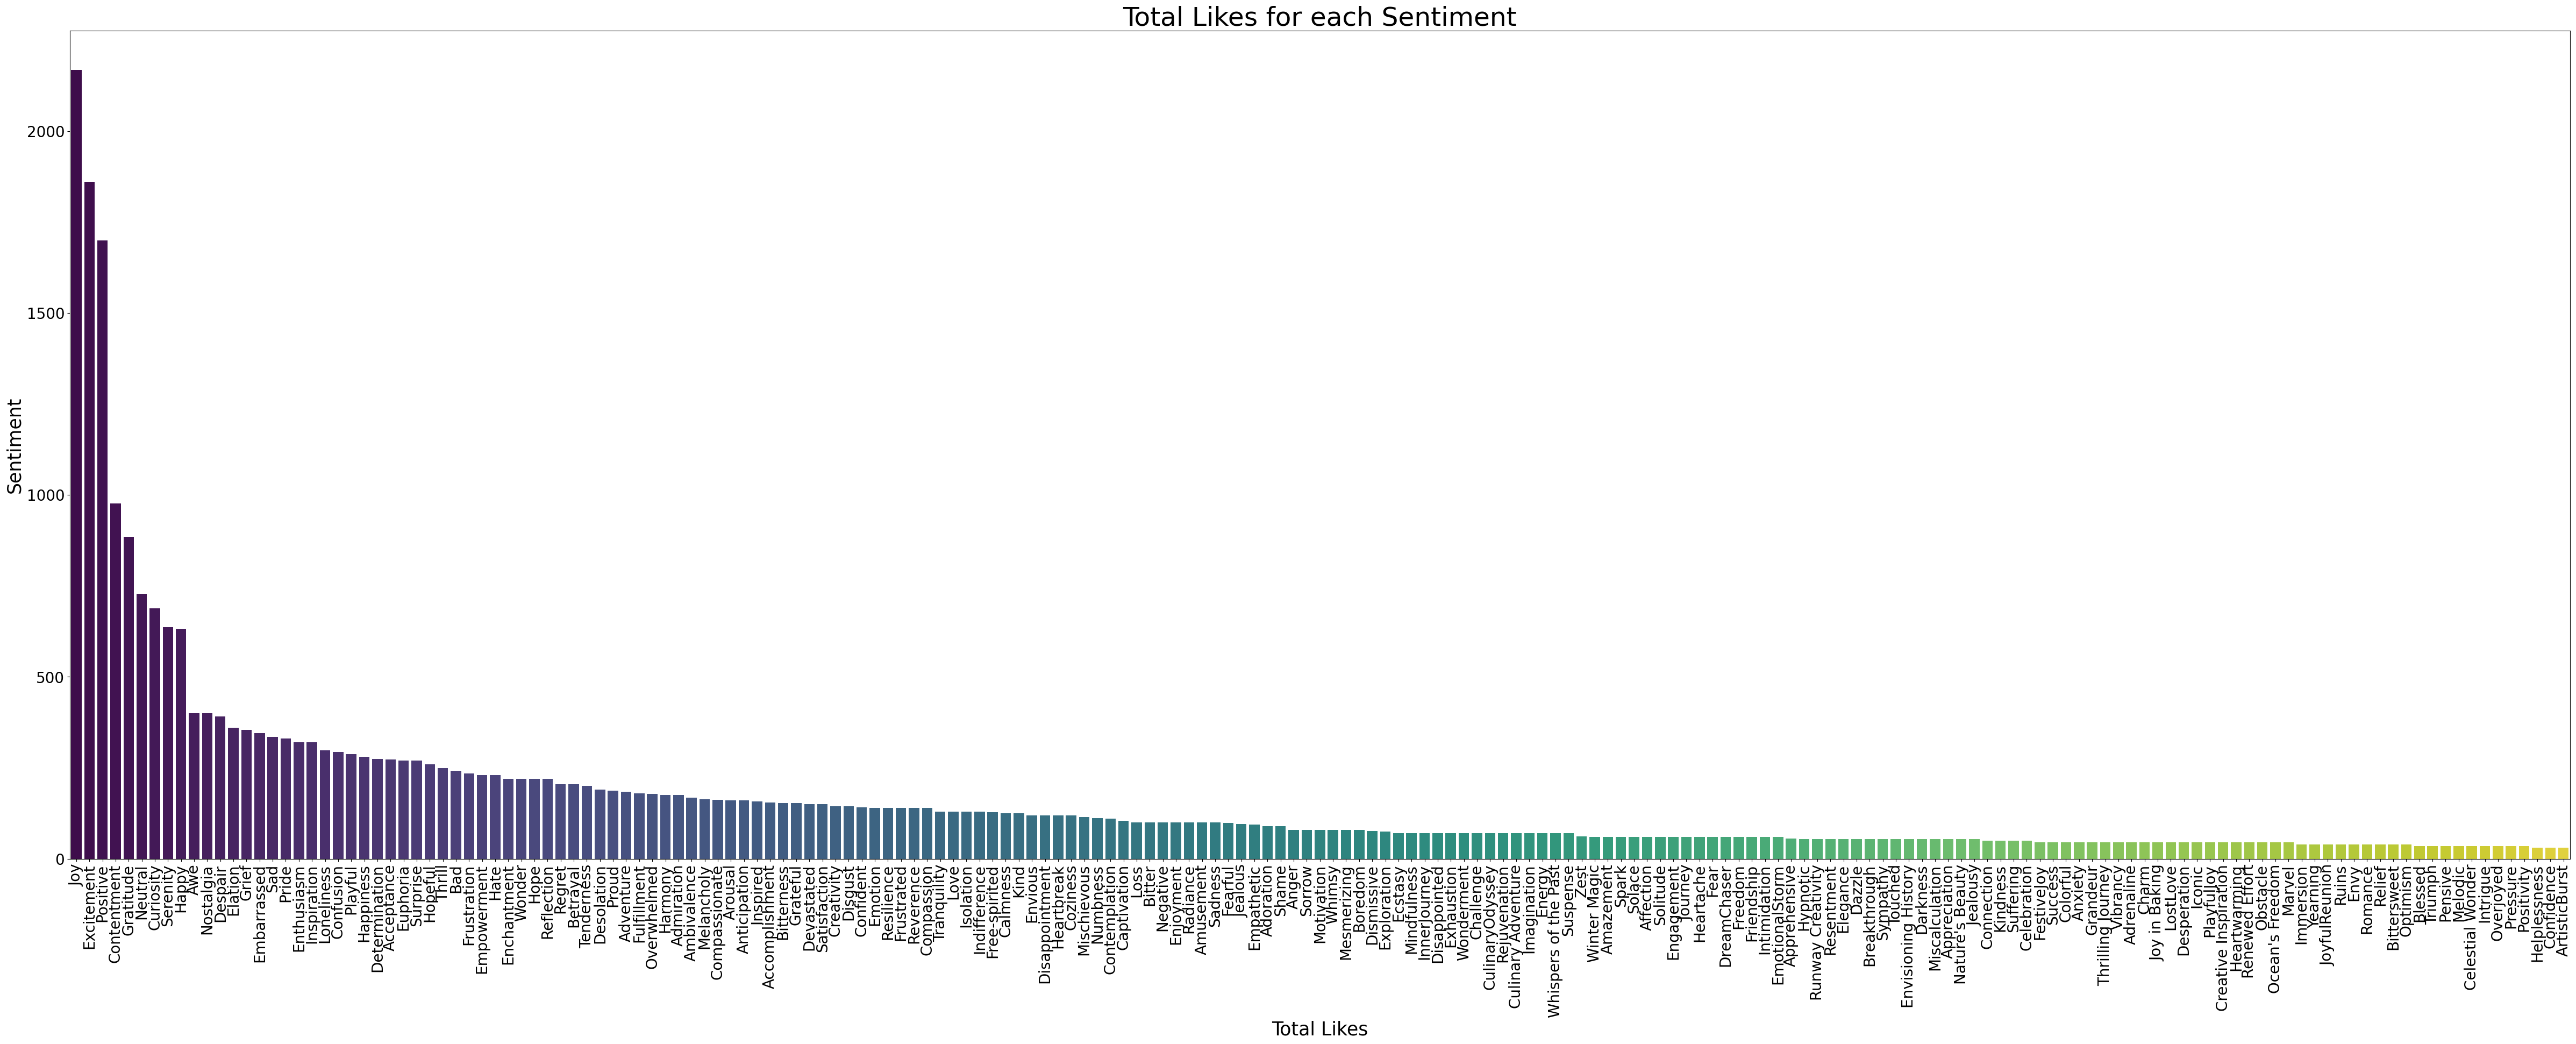

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
Sentiment = Sentiment.sort_values(by='Likes', ascending=False)


plt.figure(figsize=(60,20))
ax = sns.barplot(x='Sentiment', y='Likes', data=Sentiment, palette="viridis")

# Set the title and labels
ax.set_title('Total Likes for each Sentiment', fontsize=35)
ax.set_xlabel('Total Likes', fontsize=25)
ax.set_ylabel('Sentiment', fontsize=25)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20);
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=20);

# Display the plot
plt.show()


### From the plot above it can be observed that Sentiment Joy had highest likes of about 2400 followed by Excitement with approx 1800 likes followed by Positive with around 900likes, Contentment with 800likes. 

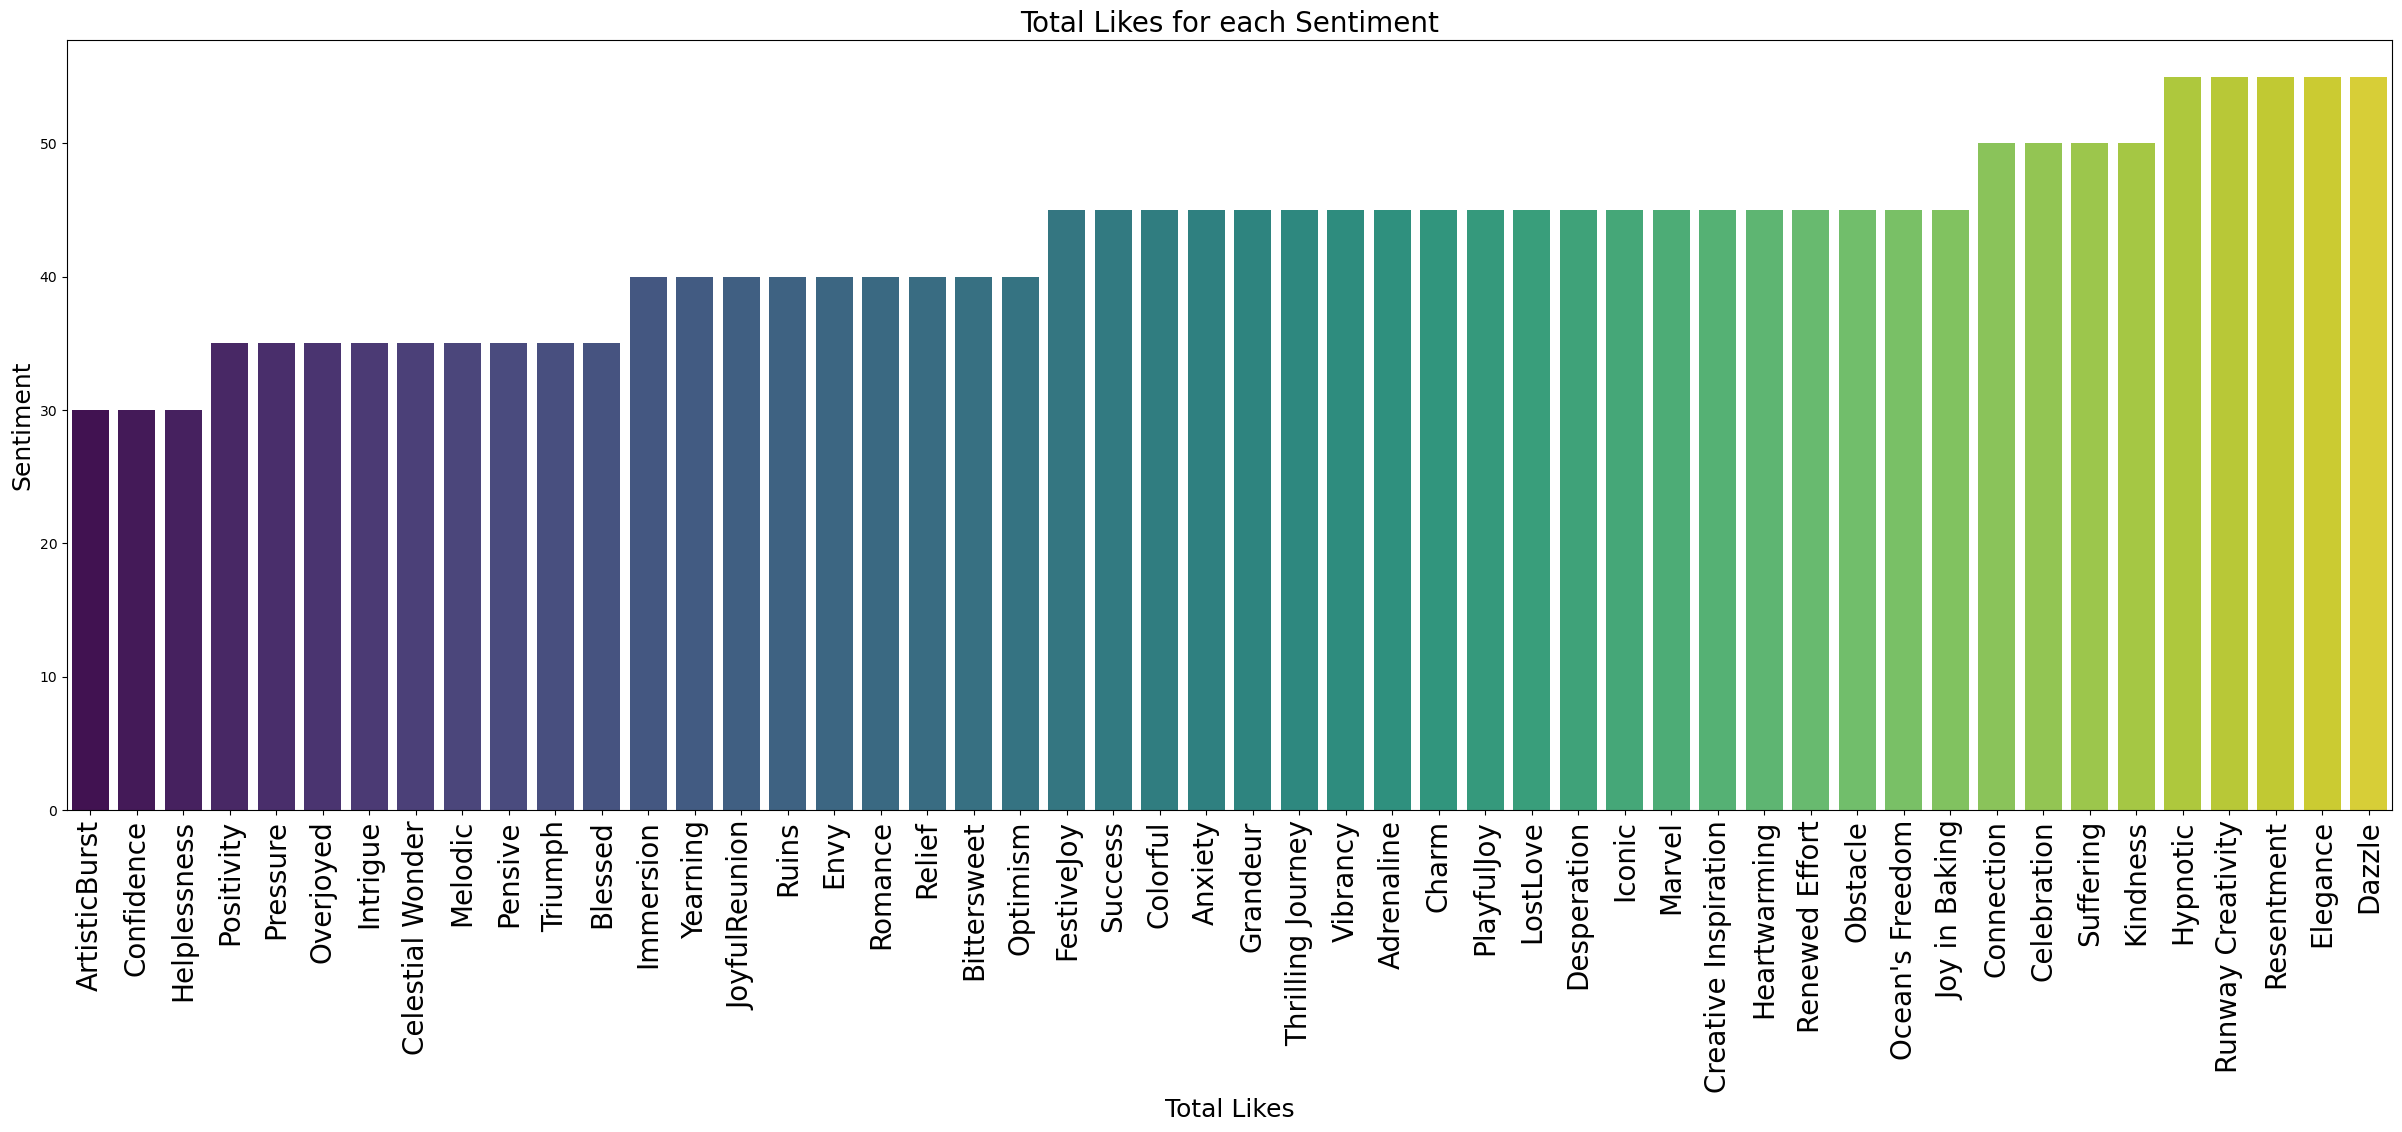

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
Sentiment_1= Sentiment.sort_values(by='Likes', ascending=True).head(50)


plt.figure(figsize=(30,10))
ax = sns.barplot(x='Sentiment', y='Likes', data=Sentiment_1, palette="viridis")

# Set the title and labels
ax.set_title('Total Likes for each Sentiment',fontsize=20)
ax.set_xlabel('Total Likes', fontsize=18)
ax.set_ylabel('Sentiment', fontsize=18)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20);

# Display the plot
plt.show()


### The sentiments such as Artistic, Confidence, Helplessness have lowest likes below 30 .The sentiments Positivity, Pressure, Overjoyed, Intrigue, Celestial Wonder, Melodic, Positive, Triumph, Blesssed have likes below 35.

### Checking Countrywise distribution of likes

In [15]:
df['Country'] = df['Country'].str.strip()

Country_like = df[['Country','Likes']]

Country_like = Country_like.groupby('Country')['Likes'].sum().reset_index()

Country_like.head()

Country   Likes
0  Australia  2926.0
1    Austria    90.0
2    Belgium   140.0
3     Brazil   900.0
4   Cambodia    40.0

C:\Users\BHAVIN\AppData\Local\Temp\ipykernel_32804\733594692.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=20);


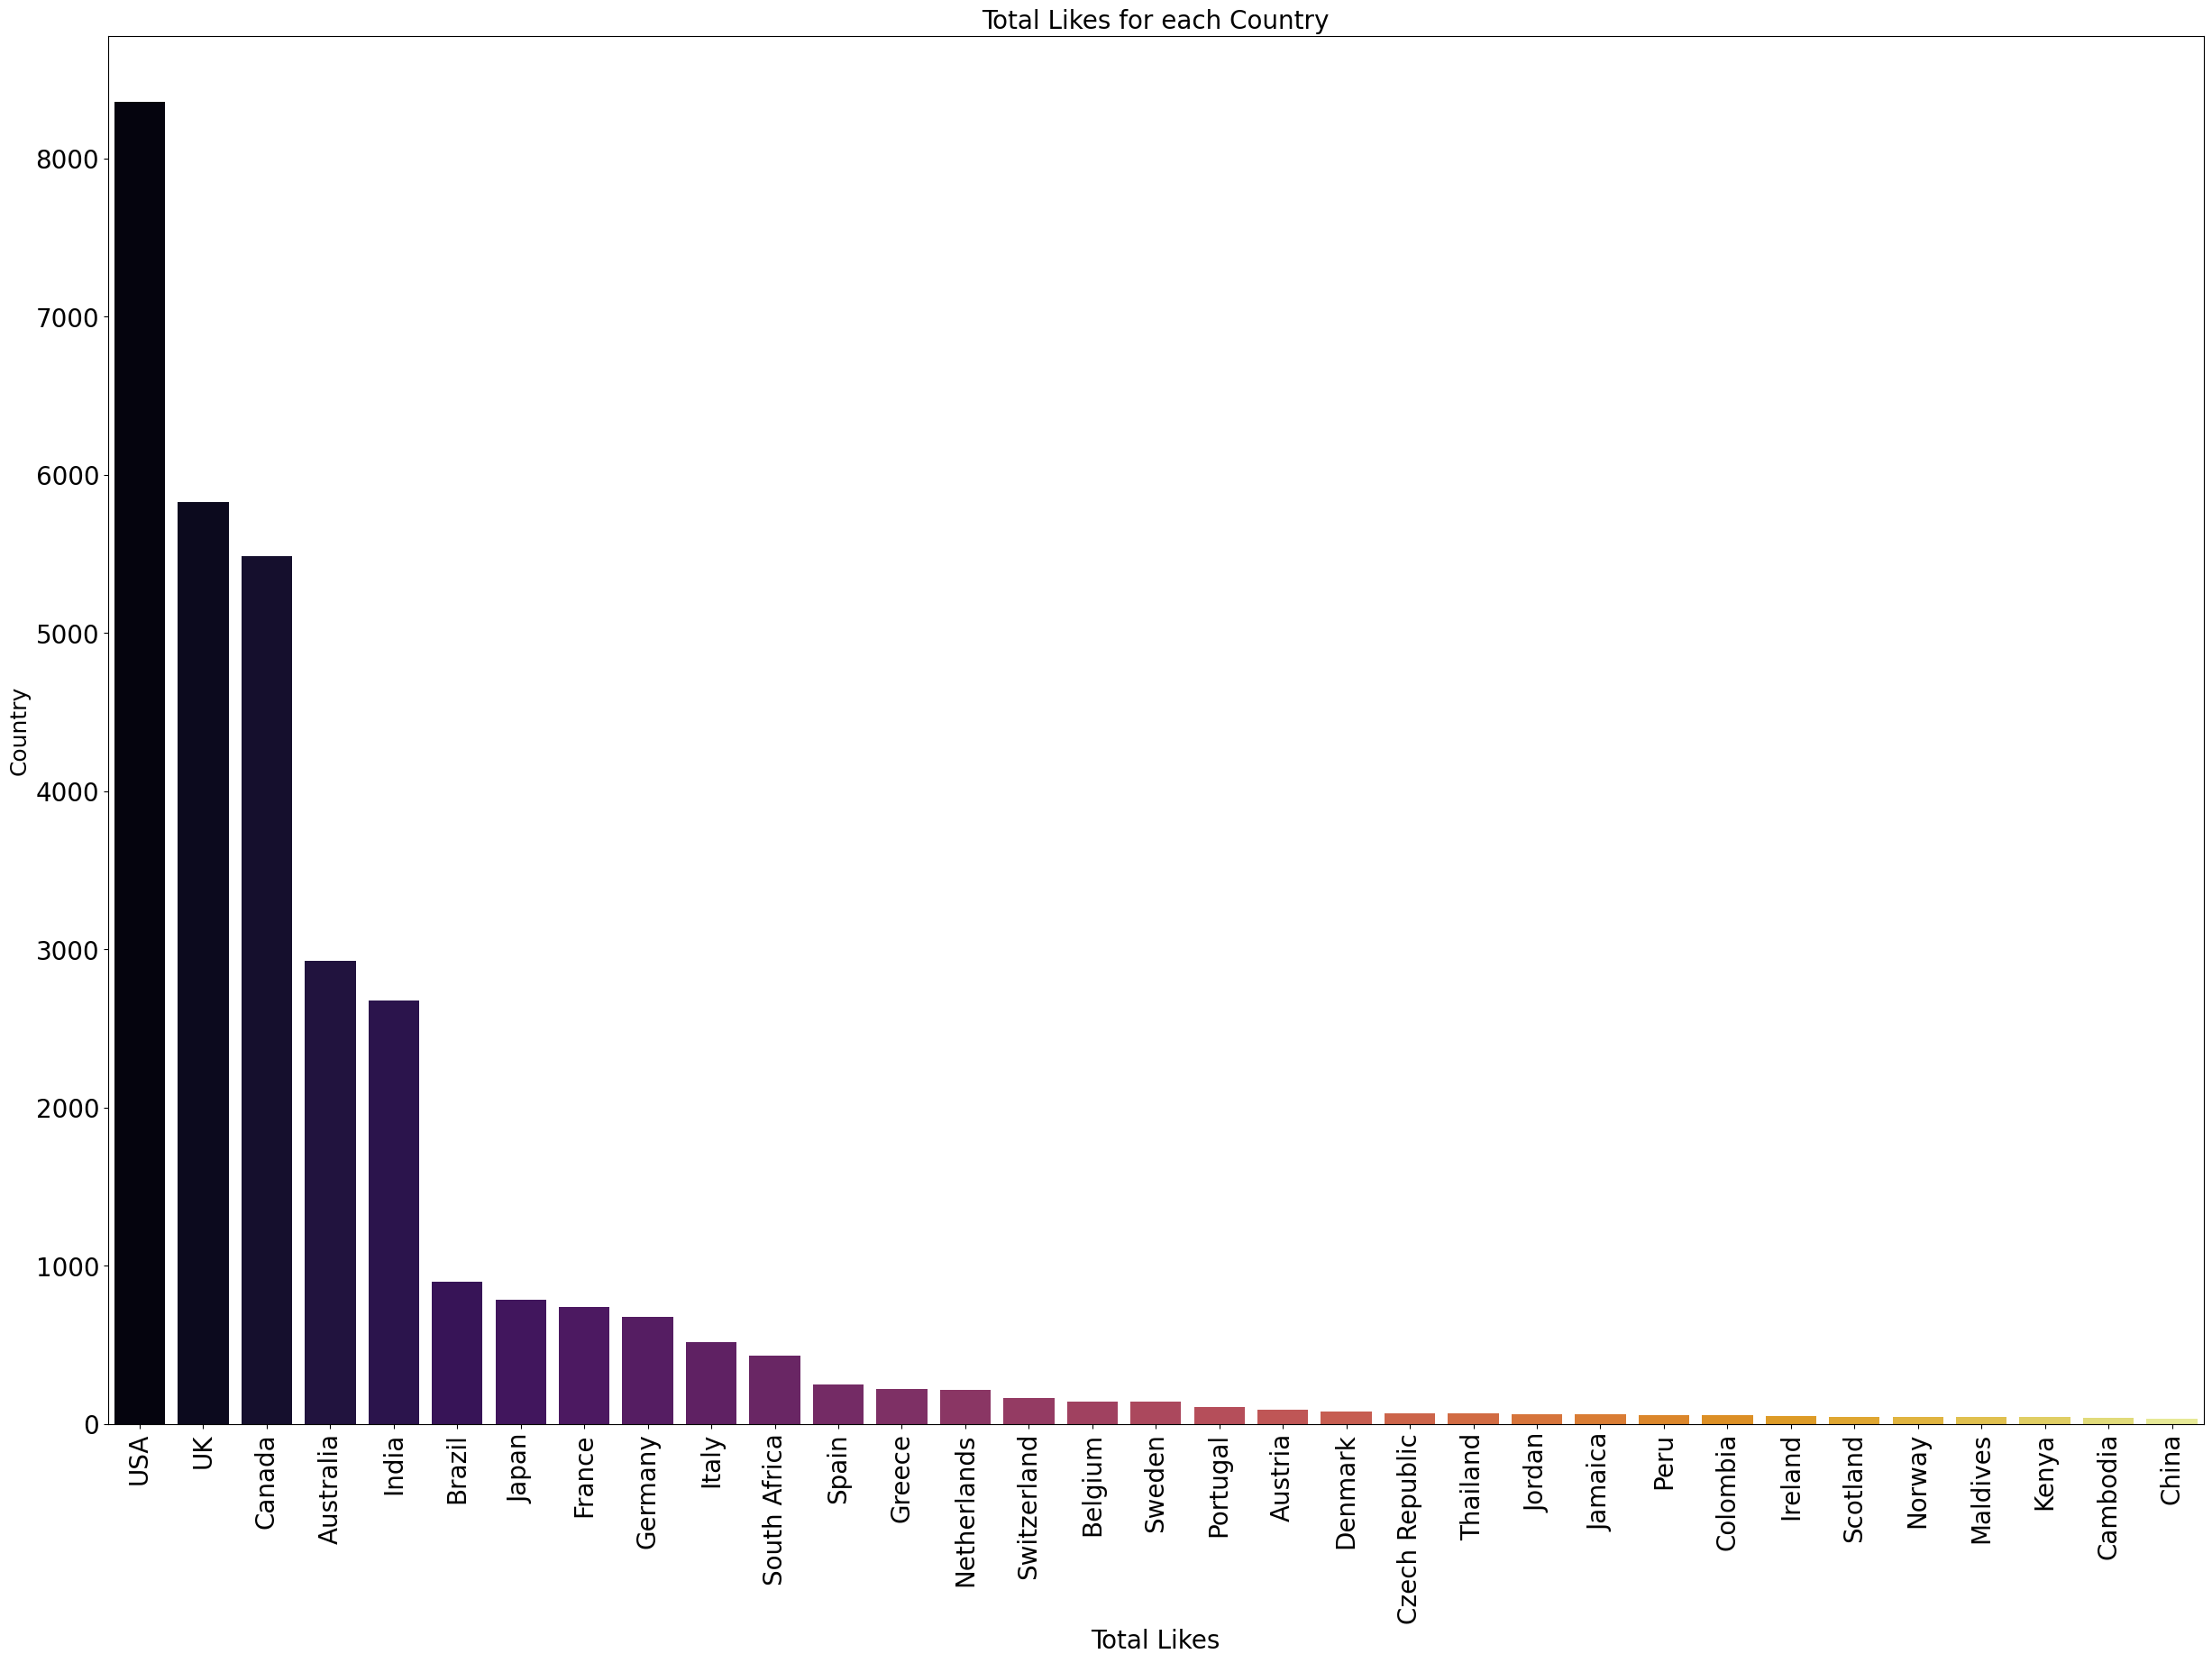

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
Country_like = Country_like.sort_values(by='Likes', ascending=False)

plt.figure(figsize=(30,20))
ax = sns.barplot(x='Country', y='Likes', data=Country_like, palette="inferno")

# Set the title and labels
ax.set_title('Total Likes for each Country', fontsize=20)
ax.set_xlabel('Total Likes', fontsize=20)
ax.set_ylabel('Country', fontsize=18)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20);
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=20);

# Display the plot
plt.show()


In [17]:
Country_like.head()

Country   Likes
32        USA  8358.0
31         UK  5827.0
5      Canada  5488.0
0   Australia  2926.0
13      India  2675.0

### The bar plot above describes the number of likes per country.USA has the highest number of likes of about 8358 followed by UK with around 5827, Canada at third with 5488 likes followed by Australia with 2926 and India with 2675 likes. China recorded lowest number of likes alongwith Cambodia, Kenya, Maldives , Norway and Scotland. This also depicts the popularity of Social media likes in these countries as well as the population using these websites.

In [18]:
df['Hashtags']=df['Hashtags'].str.strip()

df['Year'].unique()

array([2023, 2010, 2021, 2011, 2022, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020], dtype=int64)

In [19]:
Hashtags = df[['Hashtags','Retweets','Year']]

Hashtags_2023 = Hashtags[Hashtags['Year']== 2023]
Hashtags_2022 = Hashtags[Hashtags['Year']== 2022]
Hashtags_2021 = Hashtags[Hashtags['Year']== 2021]
Hashtags_2020 = Hashtags[Hashtags['Year']== 2020]
Hashtags_2019 = Hashtags[Hashtags['Year']== 2019]
#Hashtags = Hashtags.groupby('Hashtags')['Retweets'].sum().reset_index()

#Hashtags = Hashtags.head(50)

Hashtags_2023.head()

Hashtags  Retweets  Year
0       #Nature #Park      15.0  2023
1   #Traffic #Morning       5.0  2023
2   #Fitness #Workout      20.0  2023
3  #Travel #Adventure       8.0  2023
4      #Cooking #Food      12.0  2023

C:\Users\BHAVIN\AppData\Local\Temp\ipykernel_32804\3061164193.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=30);


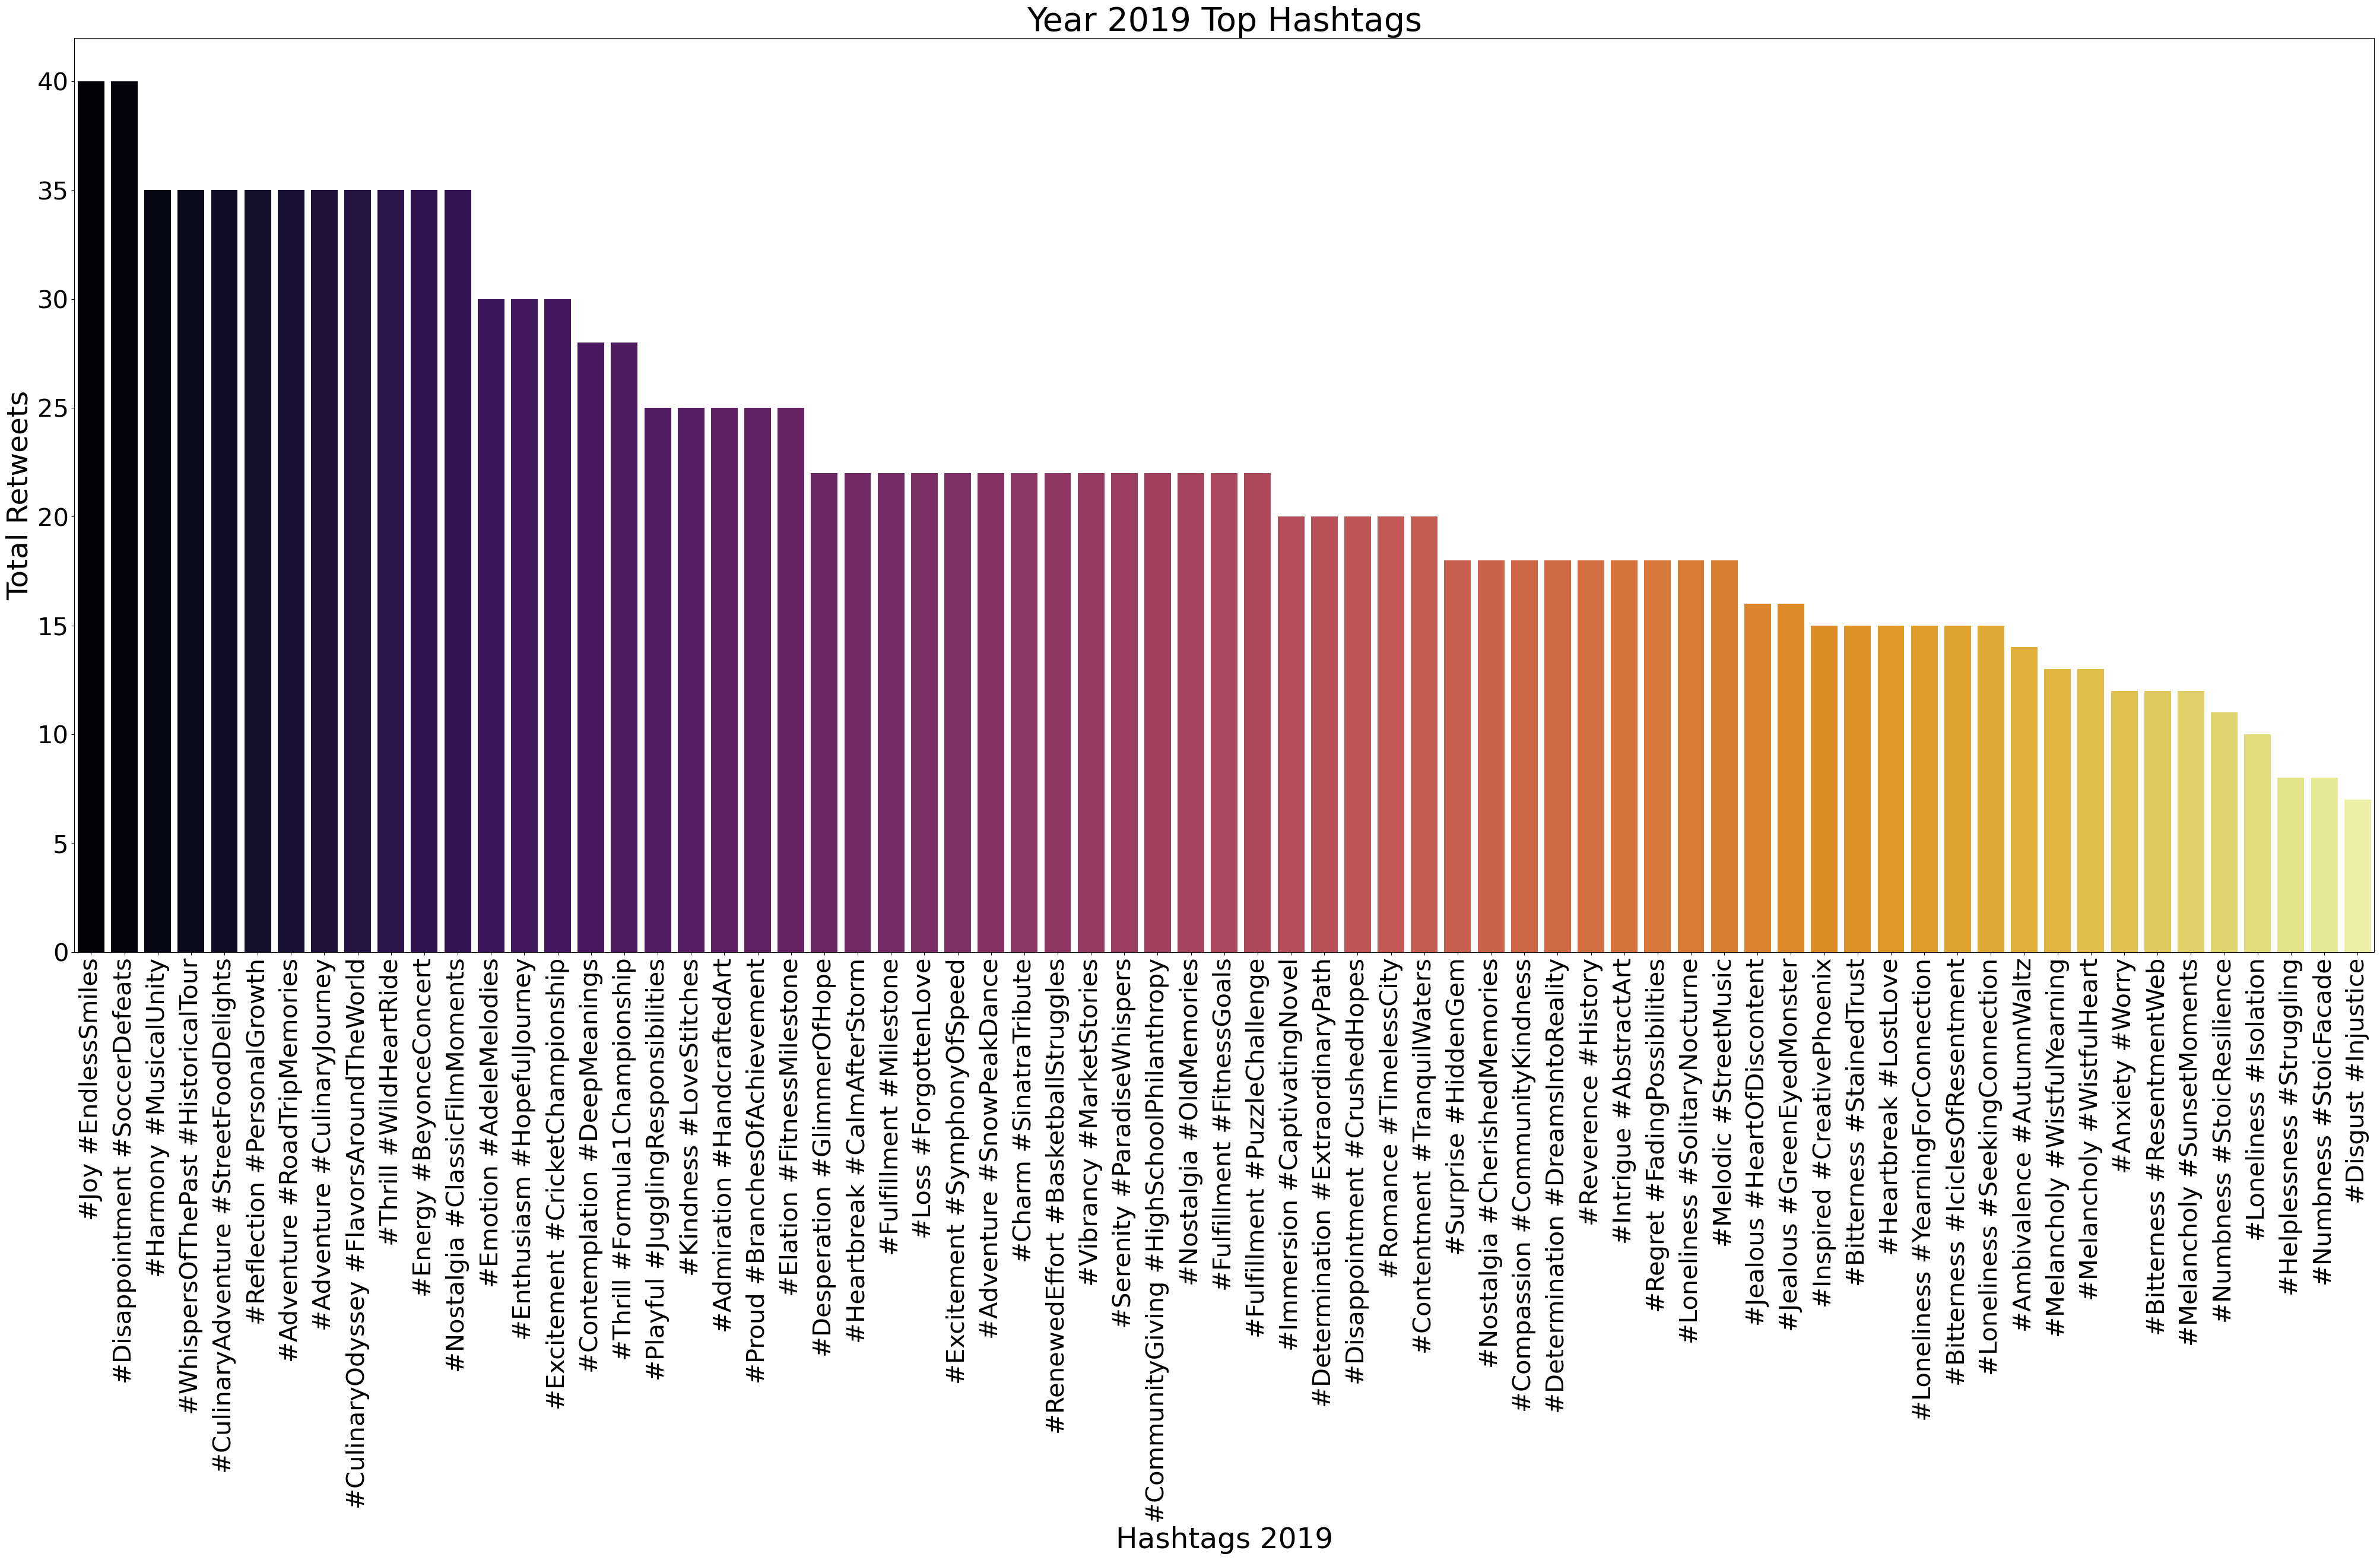

In [20]:
#YEAR 2019

import matplotlib.pyplot as plt
import seaborn as sns
Hashtags_2019 = Hashtags_2019.sort_values(by='Retweets', ascending=False)

plt.figure(figsize=(50,20))
ax = sns.barplot(x='Hashtags', y='Retweets', data=Hashtags_2019, palette="inferno")

# Set the title and labels
ax.set_title('Year 2019 Top Hashtags', fontsize=40)
ax.set_xlabel('Hashtags 2019', fontsize=35)
ax.set_ylabel('Total Retweets', fontsize=35)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=30);
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=30);

# Display the plot
plt.show()



C:\Users\BHAVIN\AppData\Local\Temp\ipykernel_32804\2229645315.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=30);


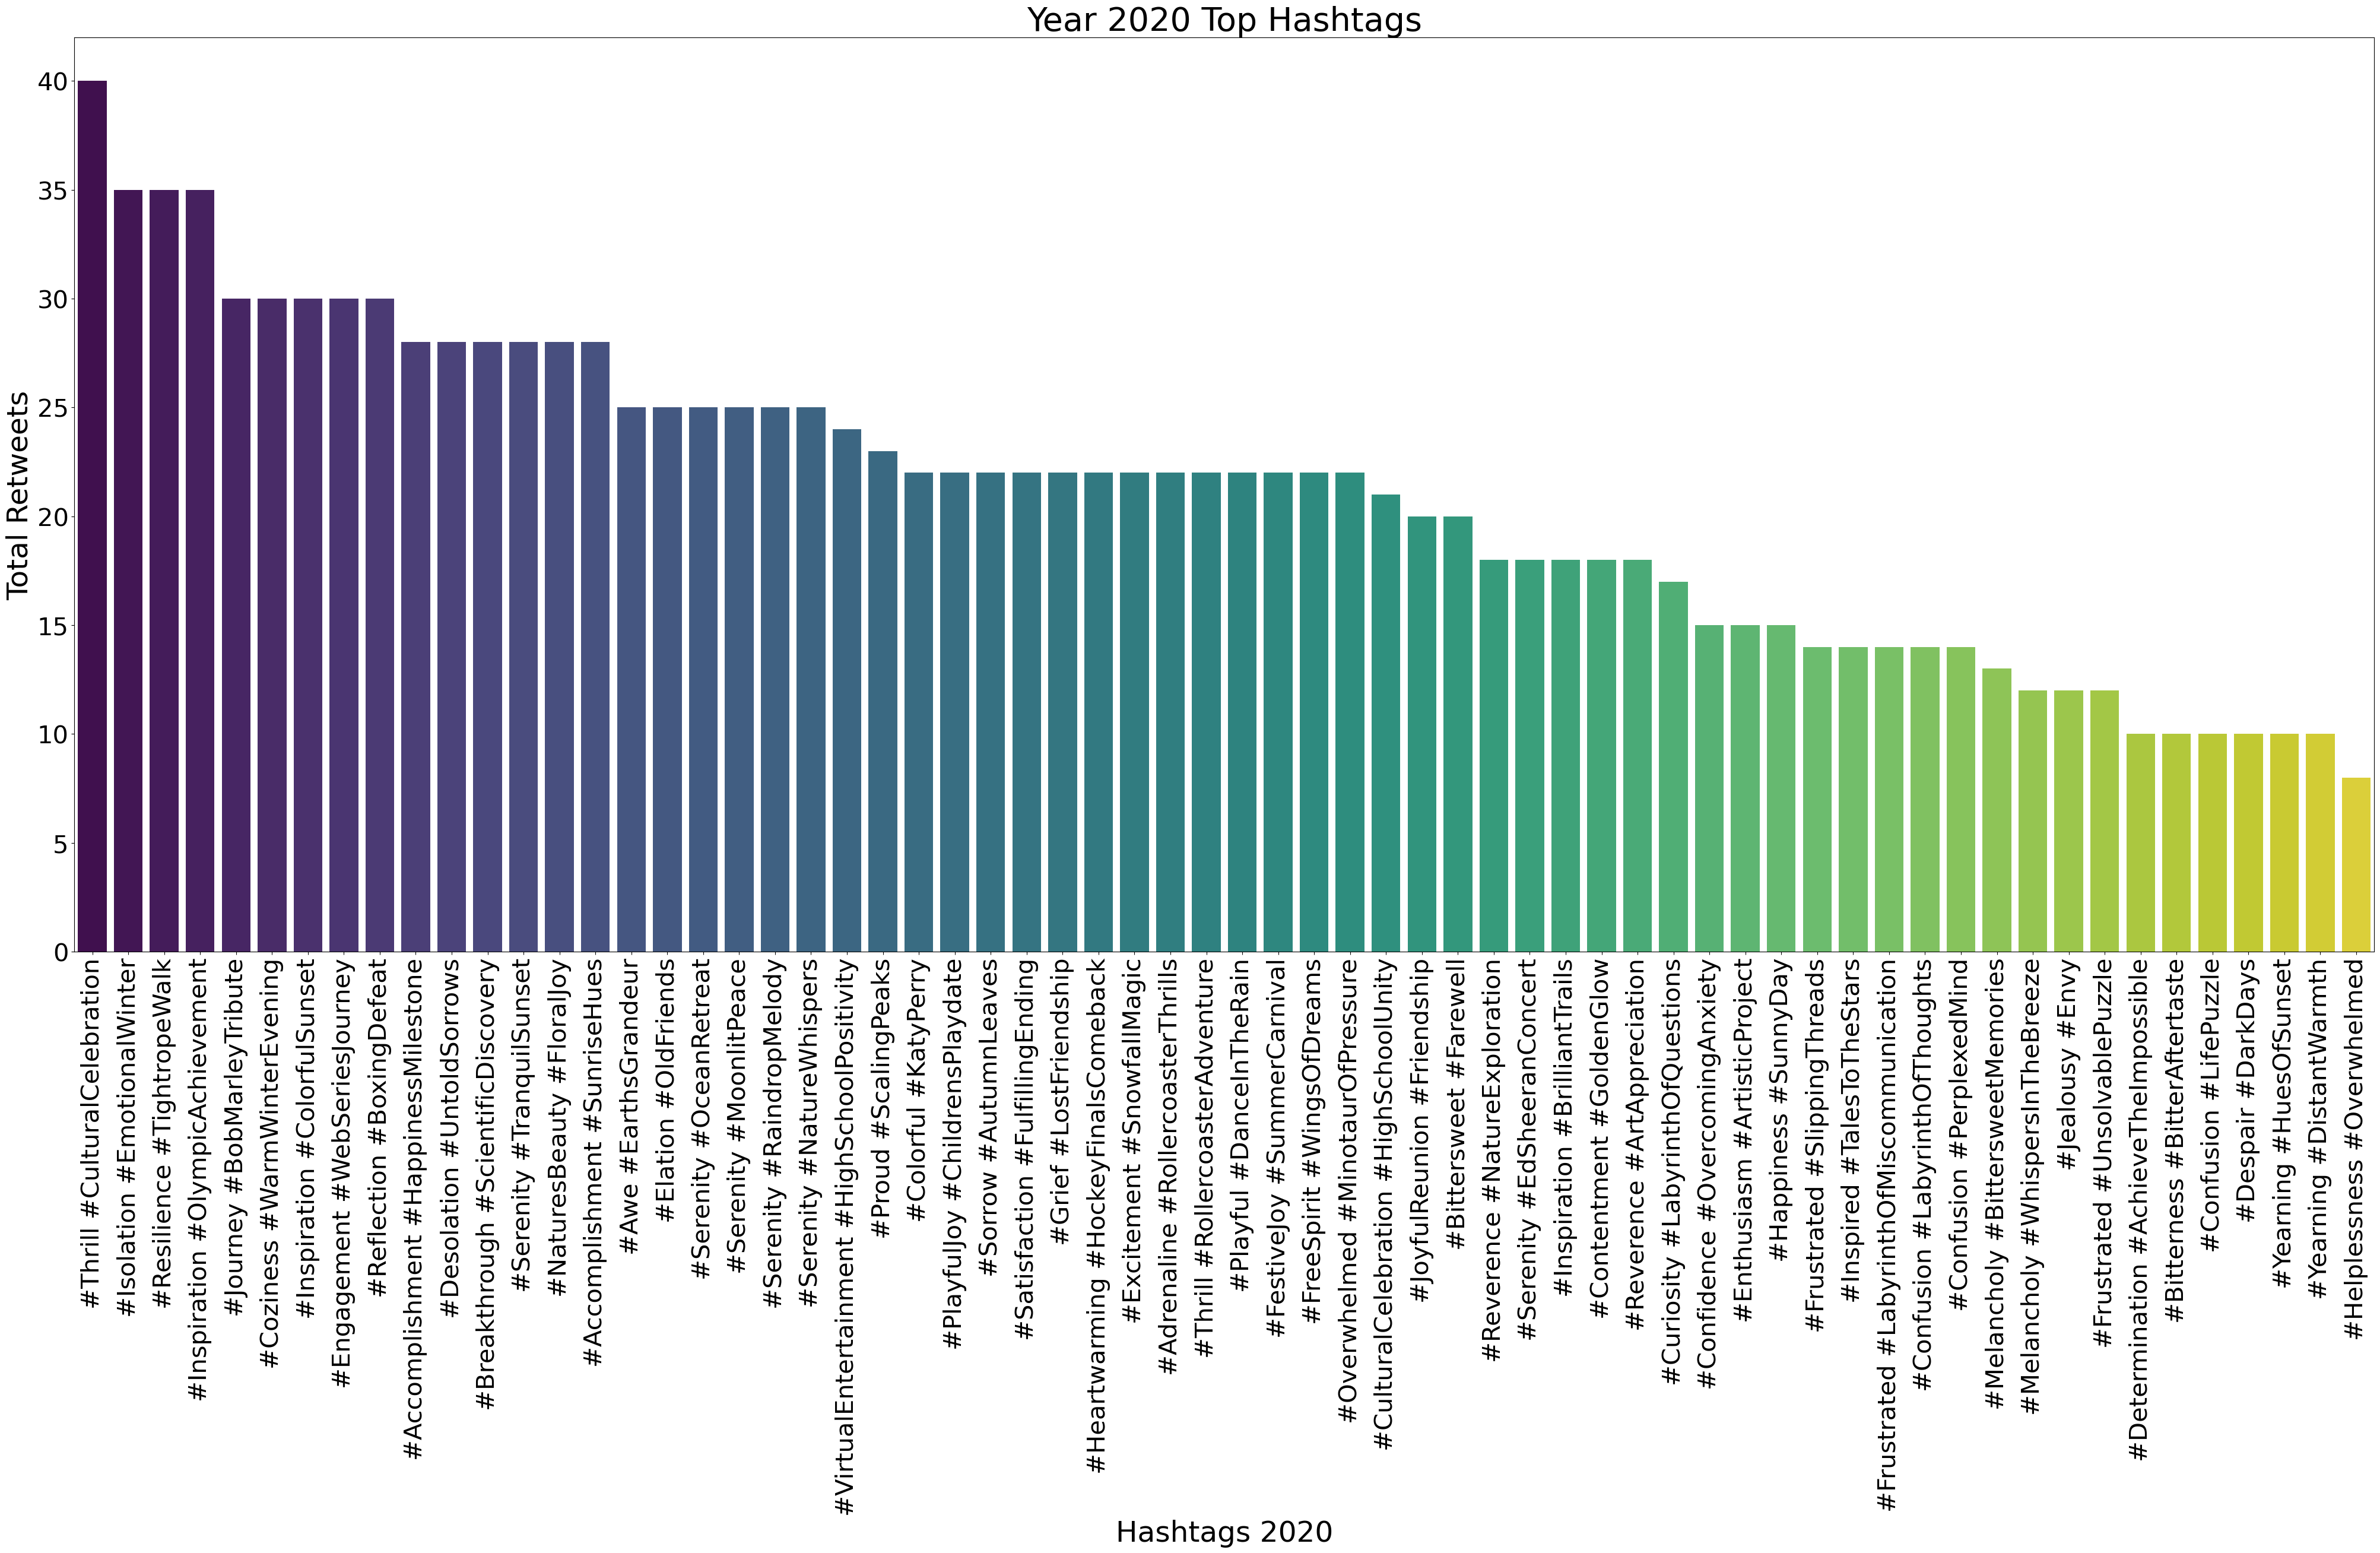

In [21]:
#YEAR 2020

import matplotlib.pyplot as plt
import seaborn as sns
Hashtags_2020 = Hashtags_2020.sort_values(by='Retweets', ascending=False)

plt.figure(figsize=(50,20))
ax = sns.barplot(x='Hashtags', y='Retweets', data=Hashtags_2020, palette="viridis")

# Set the title and labels
ax.set_title('Year 2020 Top Hashtags', fontsize=40)
ax.set_xlabel('Hashtags 2020', fontsize=35)
ax.set_ylabel('Total Retweets', fontsize=35)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=30);
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=30);

# Display the plot
plt.show()



C:\Users\BHAVIN\AppData\Local\Temp\ipykernel_32804\1769875039.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=30);


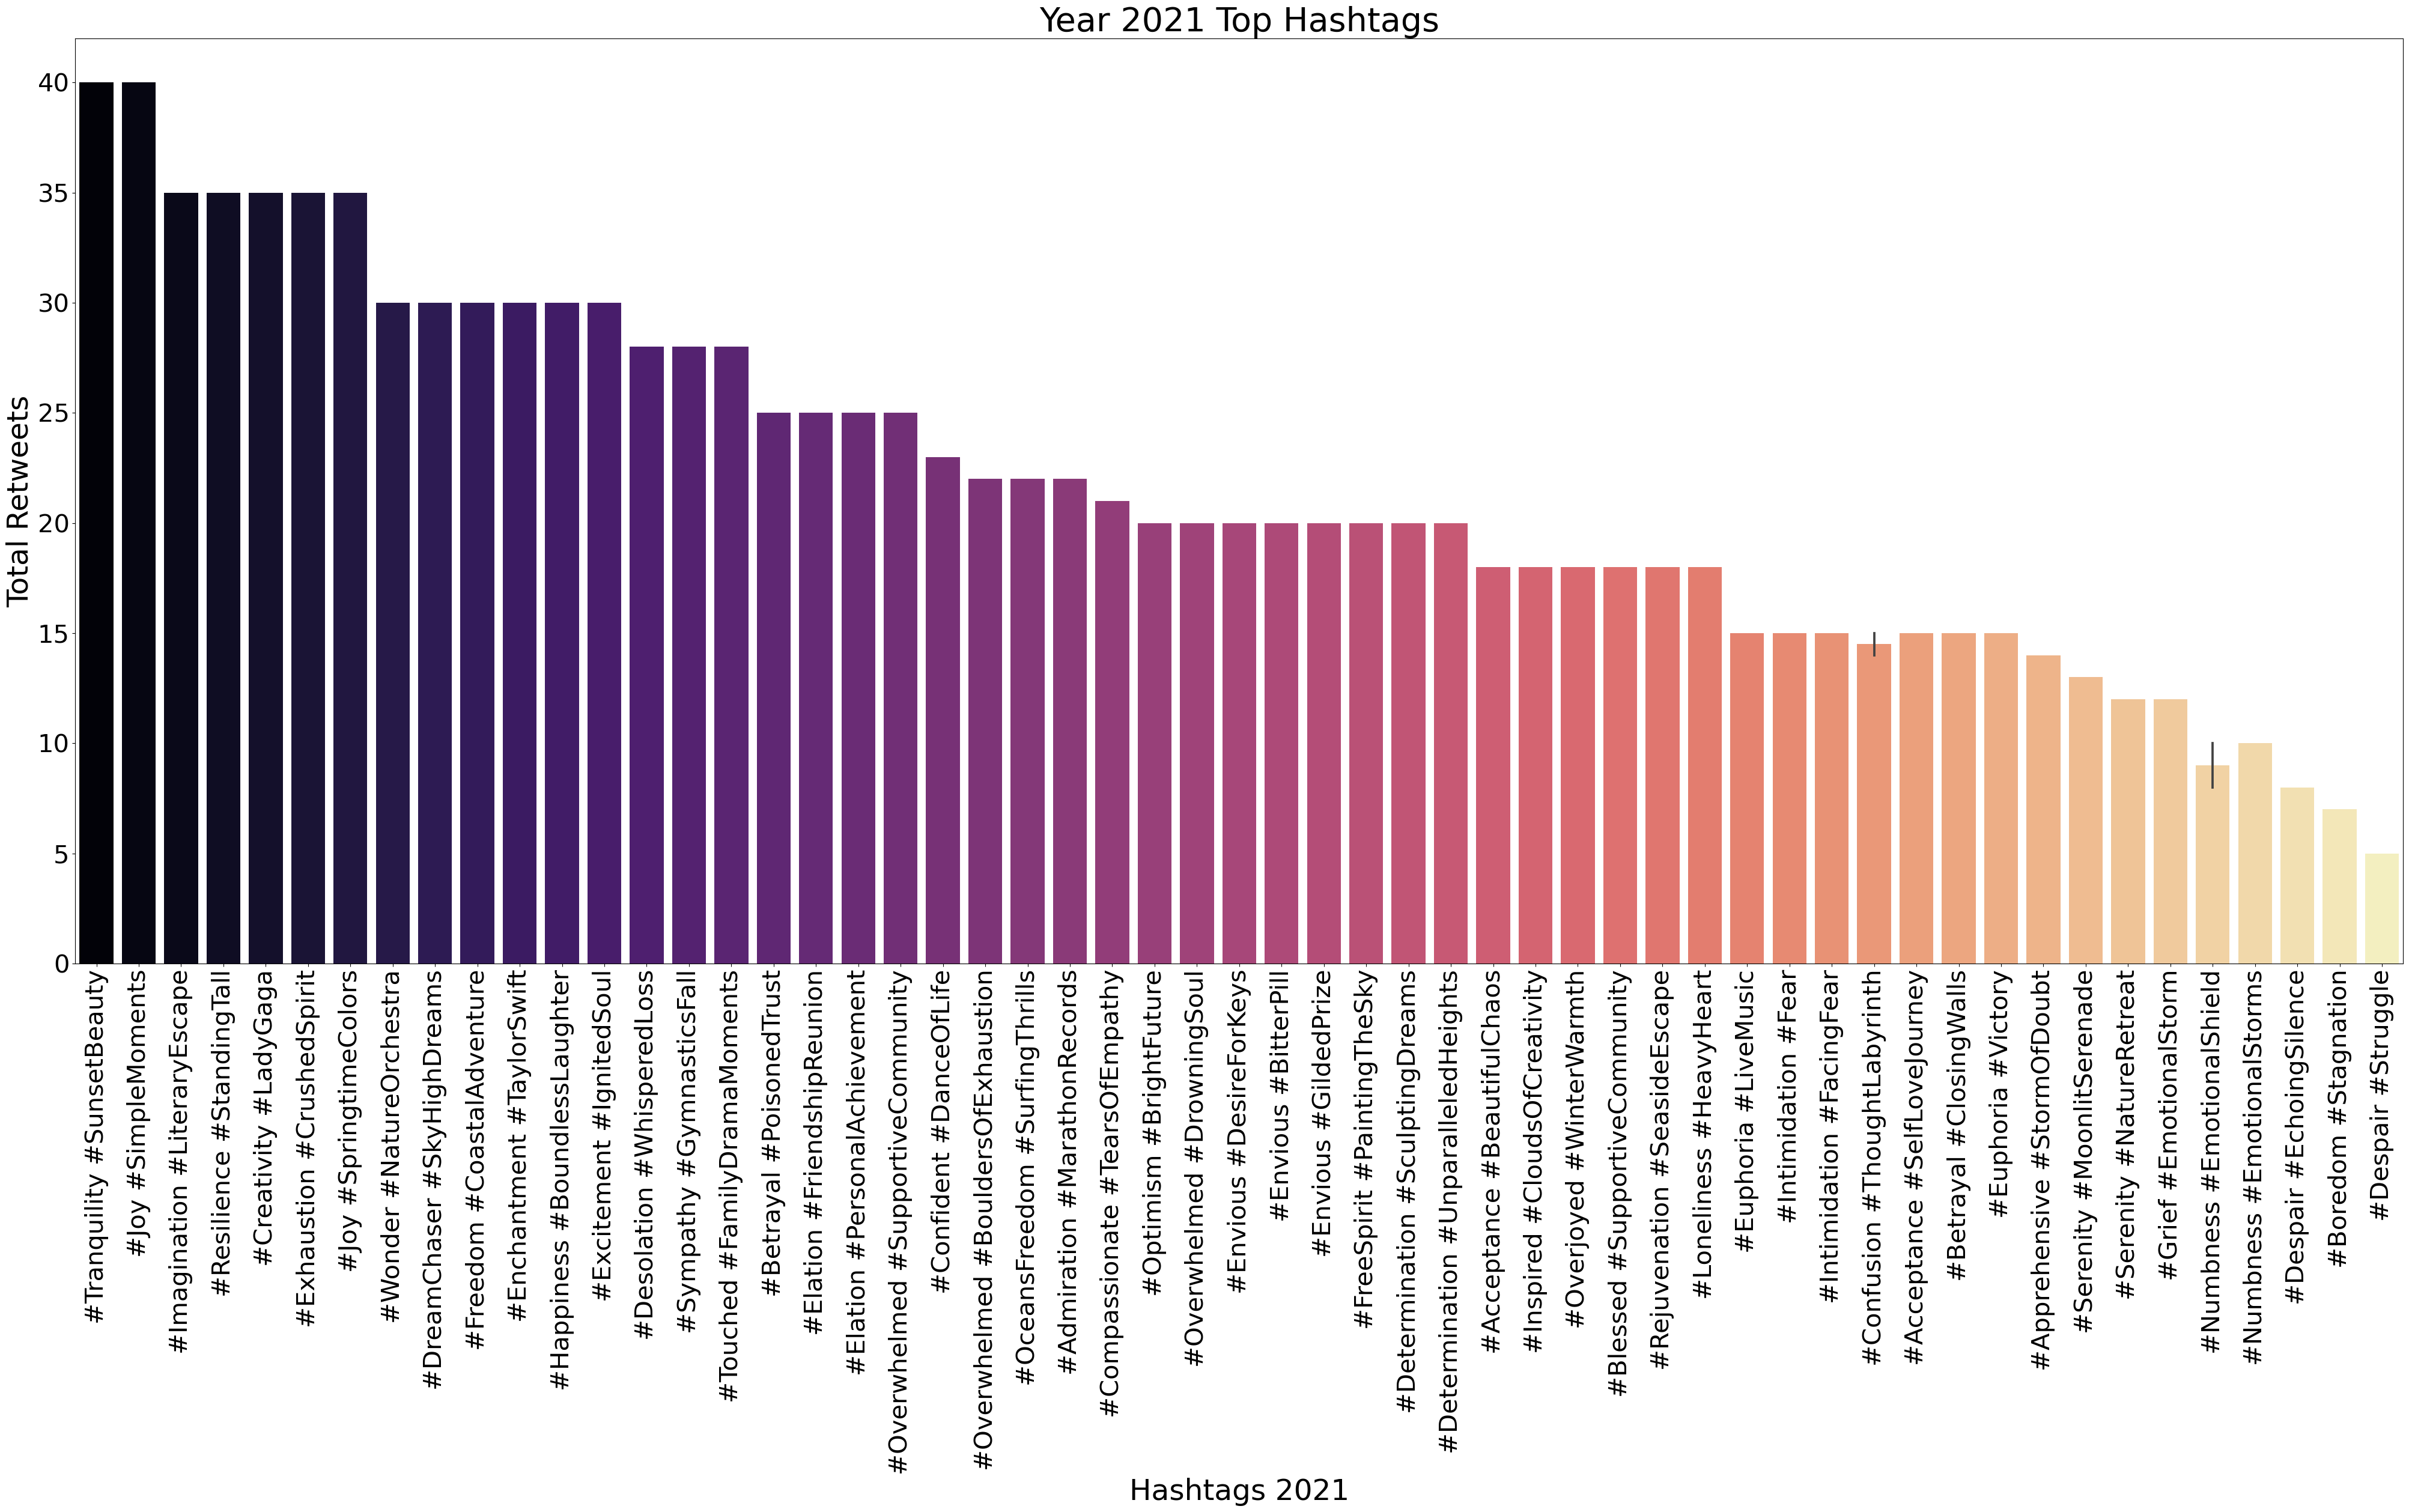

In [22]:
#YEAR 2021

import matplotlib.pyplot as plt
import seaborn as sns
Hashtags_2021 = Hashtags_2021.sort_values(by='Retweets', ascending=False)

plt.figure(figsize=(50,20))
ax = sns.barplot(x='Hashtags', y='Retweets', data=Hashtags_2021, palette="magma")

# Set the title and labels
ax.set_title('Year 2021 Top Hashtags', fontsize=40)
ax.set_xlabel('Hashtags 2021', fontsize=35)
ax.set_ylabel('Total Retweets', fontsize=35)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=30);
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=30);

# Display the plot
plt.show()



C:\Users\BHAVIN\AppData\Local\Temp\ipykernel_32804\3507662078.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=30);


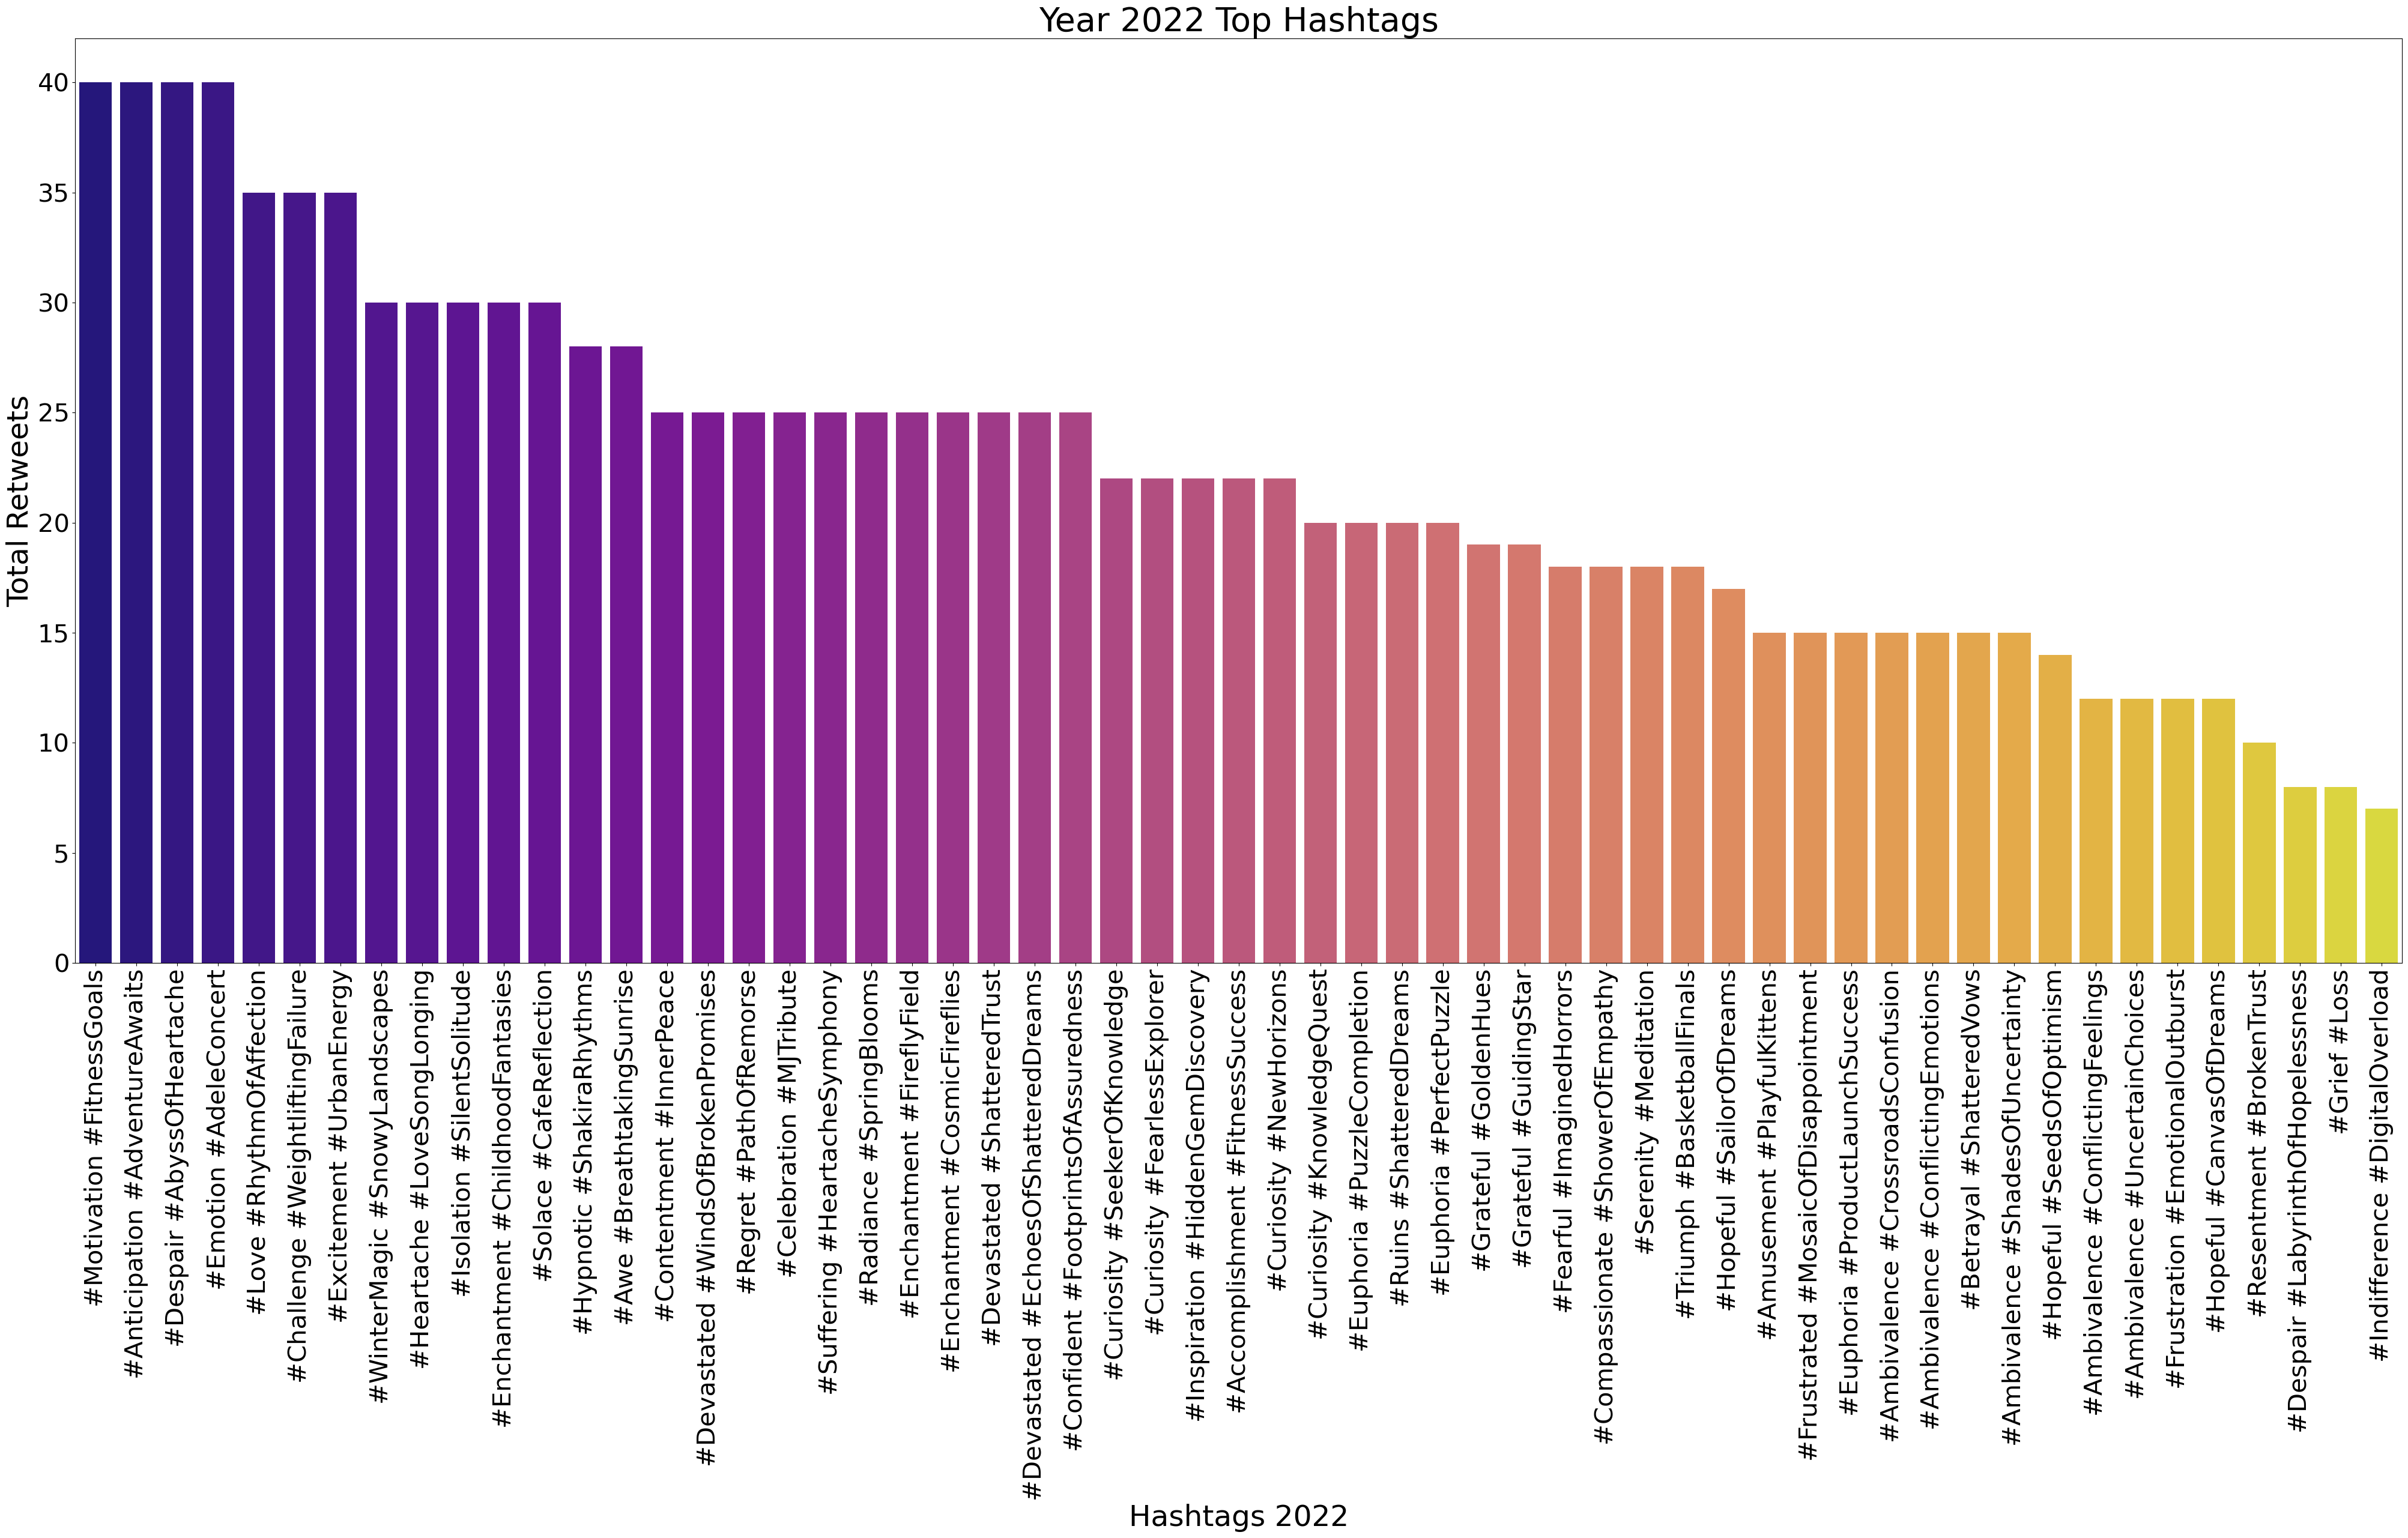

In [23]:
#YEAR 2022

import matplotlib.pyplot as plt
import seaborn as sns
Hashtags_2022 = Hashtags_2022.sort_values(by='Retweets', ascending=False)

plt.figure(figsize=(50,20))
ax = sns.barplot(x='Hashtags', y='Retweets', data=Hashtags_2022, palette="plasma")

# Set the title and labels
ax.set_title('Year 2022 Top Hashtags', fontsize=40)
ax.set_xlabel('Hashtags 2022', fontsize=35)
ax.set_ylabel('Total Retweets', fontsize=35)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=30);
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=30);

# Display the plot
plt.show()


In [24]:
Hashtags_2022.shape

(63, 3)

C:\Users\BHAVIN\AppData\Local\Temp\ipykernel_32804\1846118024.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=30);


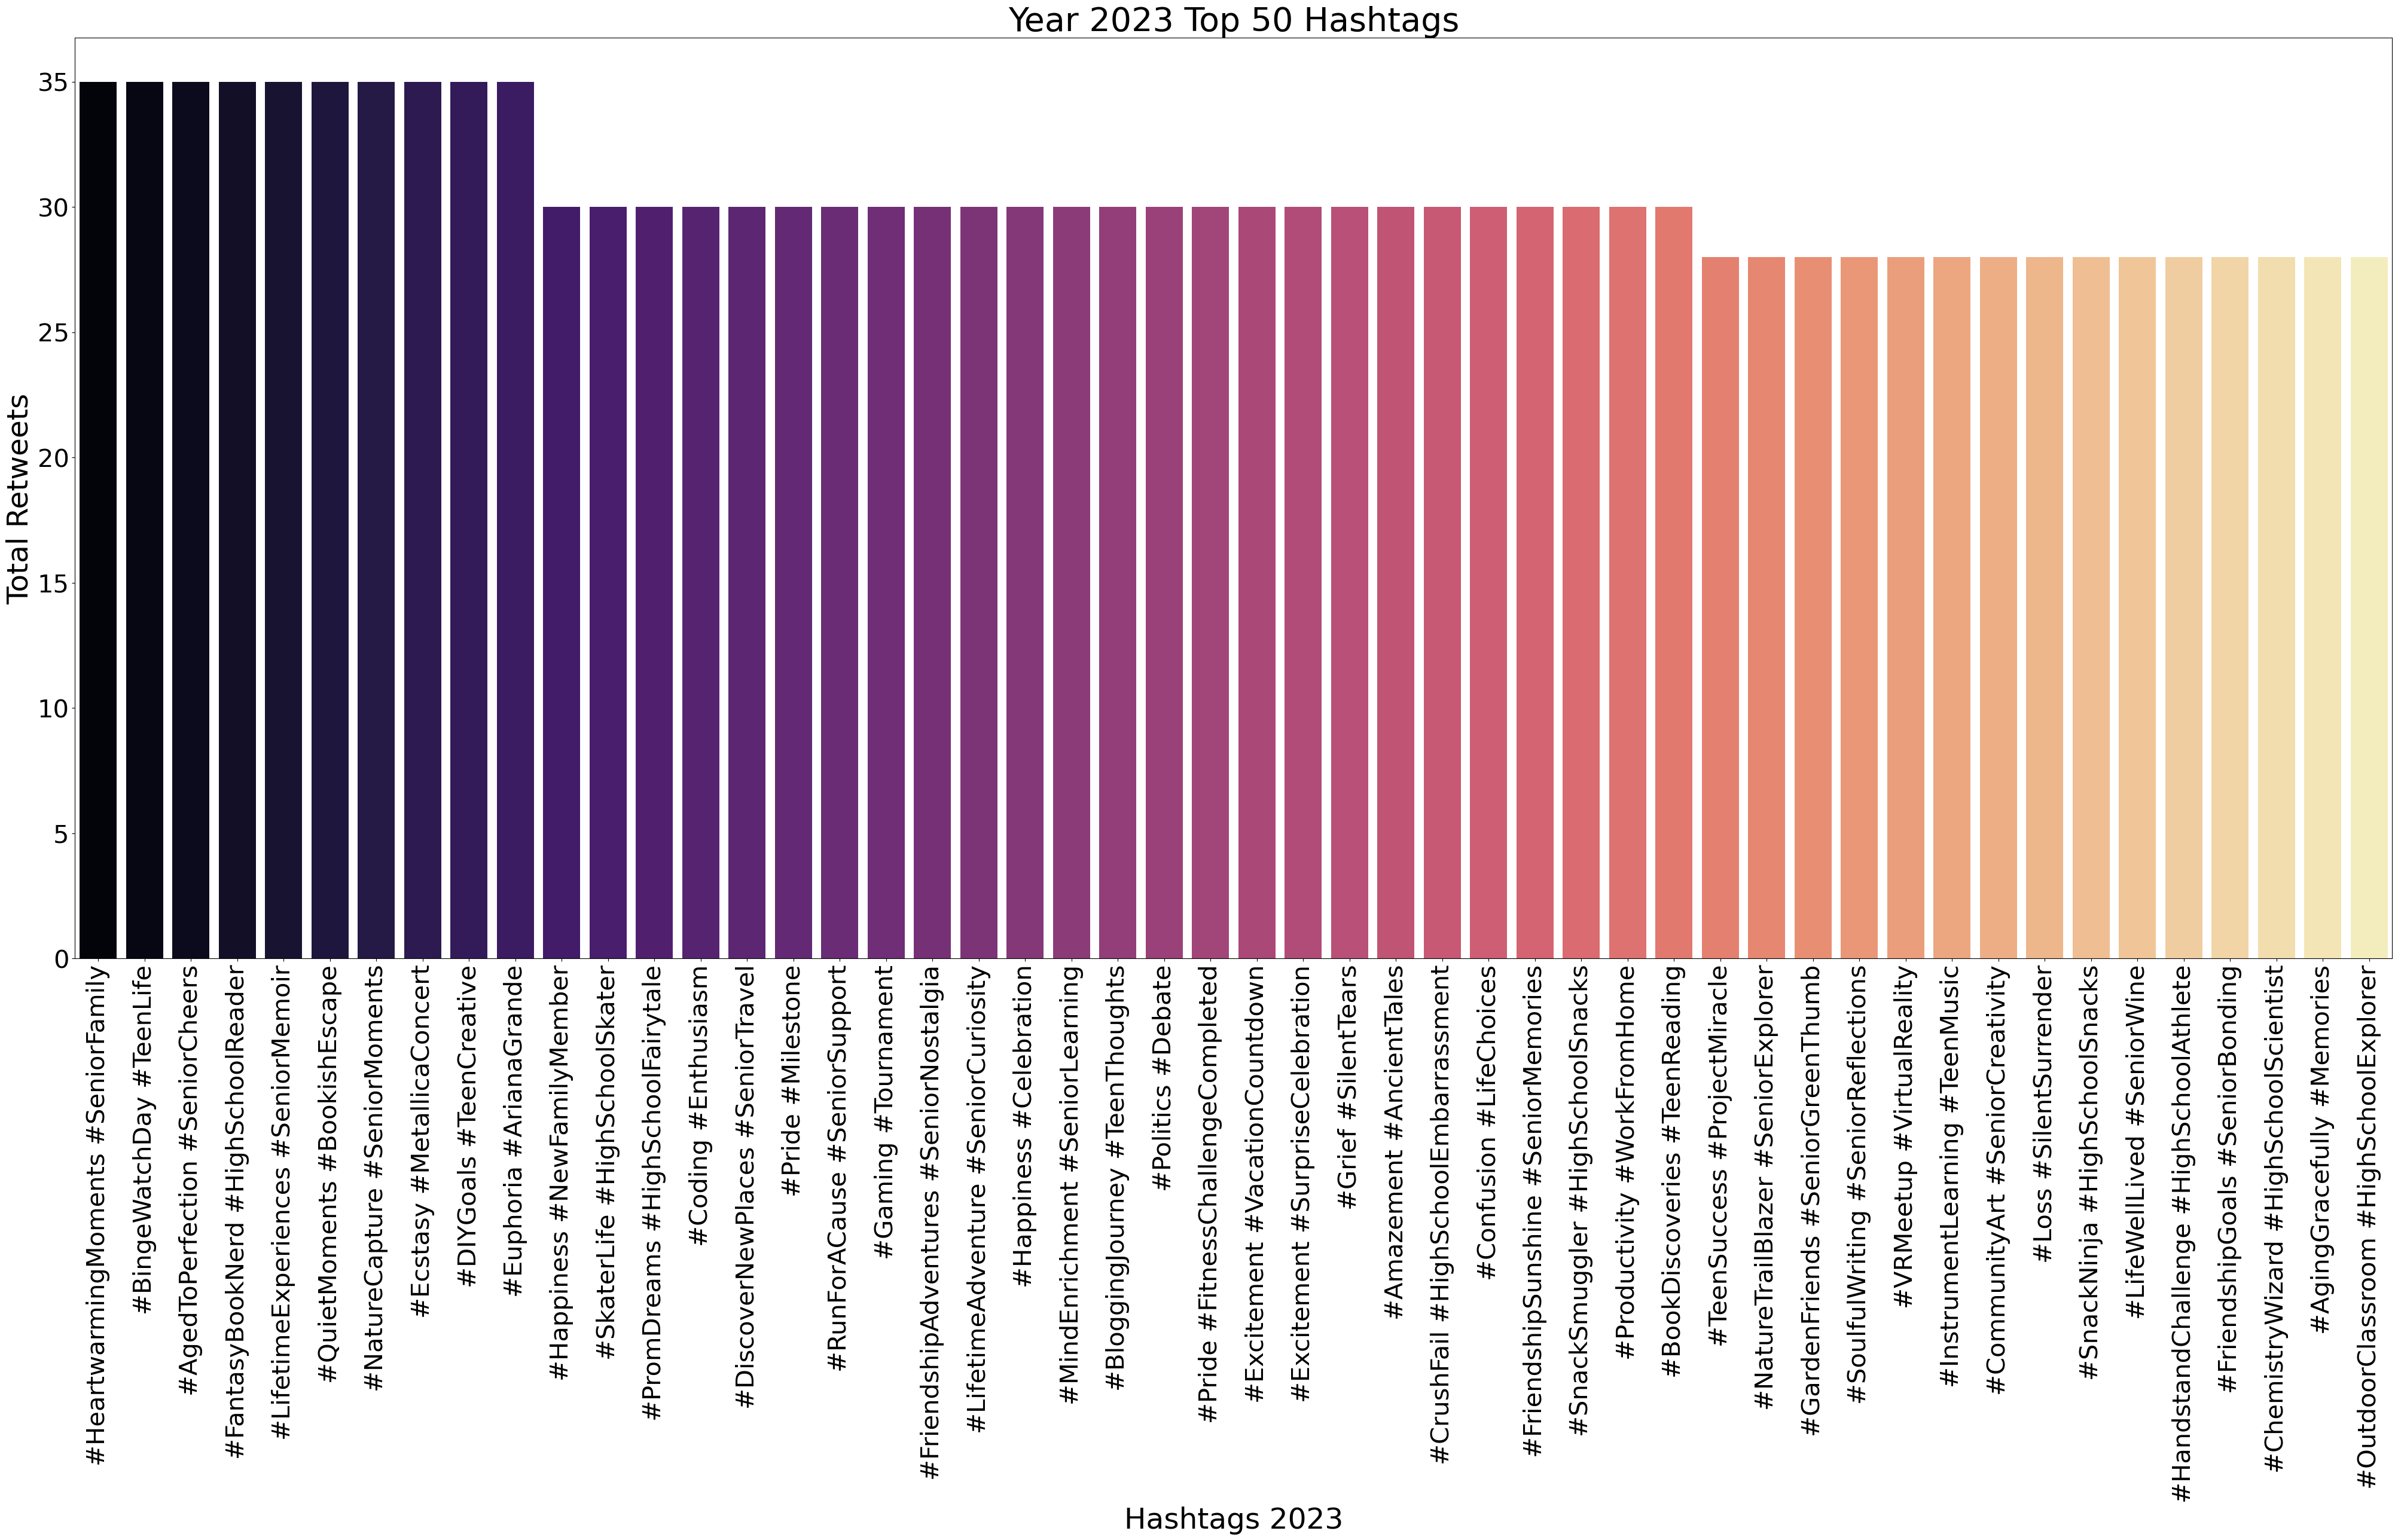

In [25]:
#YEAR 2023

import matplotlib.pyplot as plt
import seaborn as sns
Hashtags_2023 = Hashtags_2023.sort_values(by='Retweets', ascending=False).head(50)

plt.figure(figsize=(50,20))
ax = sns.barplot(x='Hashtags', y='Retweets', data=Hashtags_2023, palette="magma")

# Set the title and labels
ax.set_title('Year 2023 Top 50 Hashtags', fontsize=40)
ax.set_xlabel('Hashtags 2023', fontsize=35)
ax.set_ylabel('Total Retweets', fontsize=35)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=30);
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=30);

# Display the plot
plt.show()


### The bar plots above showcase the top trending hashtags on Twitter for the years 2019 through 2023,. From these visualizations, we can discern the shifting landscapes of social media discourse and the varying interests of the digital populace over these five years.
### In 2019, the leading hashtags reveal a focus on personal growth and achievement, as indicated by tags like #SuccessSmiles, #CulinaryJoy, and #GoalDigger, suggesting a collective interest in self-improvement and culinary experiences. 
### By 2020, the trend shifts slightly towards mindfulness and resilience, with hashtags such as #LifeInBloom and #SerenityHues, possibly reflecting a societal response to the global challenges of that year.
### In 2021, the prominence of hashtags like #DreamBig and #HustleHarder indicates a renewed emphasis on ambition and hard work, perhaps as a reaction to the economic and social pressures of the preceding year. 
### The year 2022 sees a balance between aspiration, represented by #InnovationDrive, and community, suggested by #TogetherWeCan, highlighting a dual focus on technological progress and social unity.
### Finally, in 2023, the leading hashtags like #HeartwarmingMoments and #SelfLoveWave suggest a pivot towards emotional well-being and self-care, emphasizing the importance of mental health and personal well-being after several tumultuous years.
### This progression of trending topics not only mirrors the global context of each year but also underscores the evolving priorities and values within the Twitter community. The ebb and flow of these digital conversations reflect the world's collective experiences, changing aspirations, and the shared journey through the years, as captured in the microcosm of social media hashtags.

## Applying Machine Learning Model for Sentiment Prediction

### 1) Naive Bayes MultinomialNB Model

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.2, random_state=42)

# Create a pipeline that combines the vectorizer with the Naive Bayes classifier
model = make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB())

# Fitting model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Check the accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.1360544217687075
Classification Report:
                       precision    recall  f1-score   support

          Acceptance       0.00      0.00      0.00         2
          Admiration       0.00      0.00      0.00         2
           Affection       0.00      0.00      0.00         1
         Ambivalence       0.00      0.00      0.00         1
               Anger       0.00      0.00      0.00         1
        Anticipation       0.00      0.00      0.00         1
             Arousal       0.00      0.00      0.00         3
                 Awe       0.00      0.00      0.00         2
                 Bad       0.00      0.00      0.00         1
            Betrayal       0.00      0.00      0.00         3
              Bitter       0.00      0.00      0.00         1
          Bitterness       0.00      0.00      0.00         1
         Bittersweet       0.00      0.00      0.00         1
             Boredom       0.00      0.00      0.00         1
            Calm

D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### The 'accuracy' of the model is 0.14, which indicates that only 14% of the predictions made by the model were correct. This is a very low accuracy rate and suggests that the model is not performing well on the dataset.
### Macro average precision is 0.03, recall is 0.04, and f1-score is 0.03, which are all very low. This suggests that the model's performance is poor across all classes.
### The weighted average precision is 0.07, recall is 0.14, and f1-score is 0.06. These scores are also low, indicating that the model does not perform well, especially on classes that have more instances.

### 2) Random Forest Model

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the Random Forest classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

#Fitting the model
model_rf.fit(X_train_tfidf,y_train)

#Predicting the outputs
y_pred_tfidf = model_rf.predict(X_test_tfidf)


# Check the accuracy


print("Classification Report:\n", classification_report(y_test, y_pred_tfidf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_tfidf)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tfidf))

Classification Report:
                       precision    recall  f1-score   support

          Acceptance       0.67      1.00      0.80         2
          Admiration       0.00      0.00      0.00         2
           Affection       0.00      0.00      0.00         1
         Ambivalence       1.00      1.00      1.00         1
               Anger       0.00      0.00      0.00         1
        Anticipation       0.00      0.00      0.00         1
             Anxiety       0.00      0.00      0.00         0
             Arousal       0.50      0.33      0.40         3
       ArtisticBurst       0.00      0.00      0.00         0
                 Awe       0.33      0.50      0.40         2
                 Bad       1.00      1.00      1.00         1
            Betrayal       0.50      0.33      0.40         3
              Bitter       1.00      1.00      1.00         1
          Bitterness       1.00      1.00      1.00         1
         Bittersweet       0.00      0.00    

D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-sc

### Note: The warnings in the output above indicate that the precision, recall, and F-score are ill-defined for some labels in your dataset because there are no predicted samples for those labels, or no true samples, which means that for some classes, there were either no predictions made by the model, or there are no instances in the true labels. This can happen in a highly imbalanced dataset where one or more classes are underrepresented.
### The warning message suggests using the zero_division parameter to control this behavior. When calculating precision, recall, and F-scores, a division by zero can occur if there are no true positives or predicted positives for a given class. By setting zero_division=1, you're essentially saying "in cases where division by zero would occur, just assume a value of 1 (100%) for that particular precision/recall calculation." This is a way to handle the warning, but it may not be the most informative for your model evaluation.
### In this case, zero_division=0 means that you will assign 0 (0%) instead of 1 (100%) when division by zero occurs, which may be more appropriate in most cases.

In [28]:
print("Classification Report:\n", classification_report(y_test, y_pred_tfidf,zero_division=0))
print(f"Accuracy: {accuracy_score(y_test, y_pred_tfidf)}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tfidf))

Classification Report:
                       precision    recall  f1-score   support

          Acceptance       0.67      1.00      0.80         2
          Admiration       0.00      0.00      0.00         2
           Affection       0.00      0.00      0.00         1
         Ambivalence       1.00      1.00      1.00         1
               Anger       0.00      0.00      0.00         1
        Anticipation       0.00      0.00      0.00         1
             Anxiety       0.00      0.00      0.00         0
             Arousal       0.50      0.33      0.40         3
       ArtisticBurst       0.00      0.00      0.00         0
                 Awe       0.33      0.50      0.40         2
                 Bad       1.00      1.00      1.00         1
            Betrayal       0.50      0.33      0.40         3
              Bitter       1.00      1.00      1.00         1
          Bitterness       1.00      1.00      1.00         1
         Bittersweet       0.00      0.00    

###  The model's accuracy is about 41.4%, indicating less than half of the predictions were correct. The confusion matrix suggests several classes had no predictions at all, which may point to class imbalance or a need for model refinement. There are warnings related to precision and recall for at least one class, where no predictions were made. Overall, the model's performance appears to be suboptimal and could benefit from further tuning and analysis.

### 3) SVM Model

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build and train the SVM model
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)

y_pred_svm = svm_model.predict(X_test_tfidf)

# Check the accuracy


print("Classification Report:\n", classification_report(y_test, y_pred_svm))

print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Classification Report:
                       precision    recall  f1-score   support

          Acceptance       1.00      0.50      0.67         2
          Admiration       0.00      0.00      0.00         2
           Affection       0.00      0.00      0.00         1
         Ambivalence       0.00      0.00      0.00         1
               Anger       0.00      0.00      0.00         1
        Anticipation       0.00      0.00      0.00         1
             Arousal       0.00      0.00      0.00         3
                 Awe       0.00      0.00      0.00         2
                 Bad       0.00      0.00      0.00         1
            Betrayal       0.00      0.00      0.00         3
              Bitter       0.00      0.00      0.00         1
          Bitterness       0.00      0.00      0.00         1
         Bittersweet       0.00      0.00      0.00         1
             Boredom       0.00      0.00      0.00         1
            Calmness       0.00      0.00    

D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### The accuracy of the model is just 17.68% indicating that more than 82% predictions were incorrect.The Matix suggest that several classes had no predictions which may suggest a class imbalance. There are warnings for related to precision adn recall for atleast one class where no predictions were made. OVerall this model is not a good fit to predict the sentiments of the text data.

### 4) Logistic Regression Model

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)

#Using the Model
Logistic_model = LogisticRegression(random_state=42)

#Fitting the model
Logistic_model.fit(X_train_tfidf, y_train)

#Predicting the output
y_pred_log = Logistic_model.predict(X_test_tfidf)

# Check the accuracy
print("Classification Report:\n", classification_report(y_test, y_pred_log, zero_division=0))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Classification Report:
                       precision    recall  f1-score   support

          Acceptance       1.00      1.00      1.00         2
          Admiration       0.00      0.00      0.00         2
           Affection       0.00      0.00      0.00         1
         Ambivalence       0.00      0.00      0.00         1
               Anger       0.00      0.00      0.00         1
        Anticipation       0.00      0.00      0.00         1
             Arousal       0.00      0.00      0.00         3
                 Awe       0.00      0.00      0.00         2
                 Bad       0.00      0.00      0.00         1
            Betrayal       0.00      0.00      0.00         3
              Bitter       0.00      0.00      0.00         1
          Bitterness       0.00      0.00      0.00         1
         Bittersweet       0.00      0.00      0.00         1
             Boredom       0.00      0.00      0.00         1
            Calmness       0.00      0.00    

### The output from a classification model evaluation indicates the accuracy of the model is low at approximately 19.73%. The classification report indicates that for many classes, the model did not successfully predict any instances (as indicated by scores of 0.00 across precision, recall, and F1-score). The confusion matrix confirms that the model's predictions are highly concentrated in one or a few classes, with no predictions for most other classes. 

In [31]:
Output = ['Naive Bayes MultinomialNB : 16.7%', 'Random Forest Model : 41.49%', 'SVM Model : 17.68%', 'Logistic Regression Model : 19.72%'] ]

SyntaxError: unmatched ']' (3686217262.py, line 1)

In [ ]:
output_dict = {
    'Naive Bayes MultinomialNB': '16.7%',  
    'Random Forest Model': '41.49%',       
    'SVM Model': '17.68%',                 
    'Logistic Regression Model': '19.72%'  
}

Model_accuracy = pd.DataFrame(list(output_dict.items()), columns=['Model', 'Accuracy'])

print(Model_accuracy)

### It can be observed from the table above that Random Forest Model has the maximum accuracy for our dataset. We will hence create a function to predict the sentiment of a text using the Random Forest Model 

In [37]:
def sentiment(text):
    # Transform the input text to the same feature space as the trained model
    text_tfidf = tfidf_vectorizer.transform([text])
    # Predict the sentiment
    predict = model_rf.predict(text_tfidf)
    return predict[0]  # Return the predicted sentiment

while True:
    Yes_No = input('Do you want to continue? Please type Y for yes and N for No: ').strip().upper()
    if Yes_No == 'Y':
        text = input('Please enter your text: ')
        predicted_sentiment = sentiment(text)
        print(f'The predicted sentiment is: {predicted_sentiment}')
    elif Yes_No == 'N':
        print("Exiting...")
        break
    else:
        print("Invalid input. Please enter Y for yes or N for no.")


Do you want to continue? Please type Y for yes and N for No: Y
Please enter your text: stars are bright
The predicted sentiment is: Positive
Do you want to continue? Please type Y for yes and N for No: Y
Please enter your text: I am Excited for the trip
The predicted sentiment is: Positive
Do you want to continue? Please type Y for yes and N for No: Arousal of excitement before the results
Invalid input. Please enter Y for yes or N for no.
Do you want to continue? Please type Y for yes and N for No: Y
Please enter your text: Arousal of excitement before the result
The predicted sentiment is: Arousal
Do you want to continue? Please type Y for yes and N for No: Y
Please enter your text: The leaver of the flower are quite tender.
The predicted sentiment is: Positive
Do you want to continue? Please type Y for yes and N for No: Y
Please enter your text: Tenderness is in everything
The predicted sentiment is: Tenderness
Do you want to continue? Please type Y for yes and N for No: One shouldn